In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import xarray as xr
import pandas as pandas
from matplotlib.dates import DateFormatter
#from gamap_colormap import WhGrYlRd
# import xbpch
import warnings; warnings.filterwarnings("ignore")
import datetime
import cartopy.crs as ccrs
from matplotlib import dates as mdates
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
from cartopy.util import add_cyclic_point

In [2]:
# Open all of the output variables as xarray datasets
# NOTE: I used to have output of HEMCO diagnostics but I deleted them to save space 
# because HEMCO standalone runs are very easy

novolc_DryDep             = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.DryDep.2013.nc4")
novolc_RRTMG              = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.RRTMG.2013.nc4")
novolc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.SpeciesConc.2013.nc4")
novolc_StateMet           = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.StateMet.2013.nc4")
novolc_ProdLoss           = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.ProdLoss.2013.nc4")
novolc_WetLossConv        = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.WetLossConv.2013.nc4")
novolc_WetLossLS          = xr.open_dataset("./GEOSChem_output/pi_novolc/GEOSChem.WetLossLS.2013.nc4")
# pi_novolc_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/pi_novolc/HEMCO_diagnostics.2013.nc")

pi_DryDep             = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.DryDep.2013.nc4")
pi_RRTMG              = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.RRTMG.2013.nc4")
pi_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.SpeciesConc.2013.nc4")
pi_StateMet           = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.StateMet.2013.nc4")
pi_ProdLoss           = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.ProdLoss.2013.nc4")
pi_WetLossConv        = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.WetLossConv.2013.nc4")
pi_WetLossLS          = xr.open_dataset("./GEOSChem_output/pi/GEOSChem.WetLossLS.2013.nc4")
# pi_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/pi/HEMCO_diagnostics.2013.nc")

met07_volc_RRTMG              = xr.open_dataset("./GEOSChem_output/met07_volc/GEOSChem.RRTMG.2007.nc4")
met07_volc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/met07_volc/GEOSChem.SpeciesConc.2007.nc4")
met07_volc_StateMet           = xr.open_dataset("./GEOSChem_output/met07_volc/GEOSChem.StateMet.2007.nc4")
# met07_volc_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/met07_volc/HEMCO_diagnostics.2007.nc")

met07_novolc_RRTMG              = xr.open_dataset("./GEOSChem_output/met07_novolc/GEOSChem.RRTMG.2007.nc4")
met07_novolc_SpeciesConc        = xr.open_dataset("./GEOSChem_output/met07_novolc/GEOSChem.SpeciesConc.2007.nc4")
met07_novolc_StateMet           = xr.open_dataset("./GEOSChem_output/met07_novolc/GEOSChem.StateMet.2007.nc4")
# met07_novolc_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/met07_novolc/HEMCO_diagnostics.2007.nc")

iceland_RRTMG              = xr.open_dataset("./GEOSChem_output/iceland/GEOSChem.RRTMG.2013.nc4")
iceland_SpeciesConc        = xr.open_dataset("./GEOSChem_output/iceland/GEOSChem.SpeciesConc.2013.nc4")
iceland_StateMet           = xr.open_dataset("./GEOSChem_output/iceland/GEOSChem.StateMet.2013.nc4")
# iceland_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/iceland/HEMCO_diagnostics.2013.nc")

fischer_RRTMG              = xr.open_dataset("./GEOSChem_output/fischer/GEOSChem.RRTMG.2013.nc4")
fischer_SpeciesConc        = xr.open_dataset("./GEOSChem_output/fischer/GEOSChem.SpeciesConc.2013.nc4")
fischer_StateMet           = xr.open_dataset("./GEOSChem_output/fischer/GEOSChem.StateMet.2013.nc4")
# Fischer_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/fischer/HEMCO_diagnostics.2013.nc")

pi_h2s_RRTMG              = xr.open_dataset("./GEOSChem_output/pi_h2s/GEOSChem.RRTMG.2013.nc4")
pi_h2s_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pi_h2s/GEOSChem.SpeciesConc.2013.nc4")
pi_h2s_StateMet           = xr.open_dataset("./GEOSChem_output/pi_h2s/GEOSChem.StateMet.2013.nc4")
# pi_h2s_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/pi_h2s/HEMCO_diagnostics.2013.nc")

pi_h2s_17_DryDep             = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/GEOSChem.DryDep.2013.nc4")
pi_h2s_17_RRTMG              = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/GEOSChem.RRTMG.2013.nc4")
pi_h2s_17_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/GEOSChem.SpeciesConc.2013.nc4")
pi_h2s_17_StateMet           = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/GEOSChem.StateMet.2013.nc4")
pi_h2s_17_WetLossConv        = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/GEOSChem.WetLossConv.2013.nc4")
pi_h2s_17_WetLossLS          = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/GEOSChem.WetLossLS.2013.nc4")
# pi_h2s_17_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/pi_h2s_1.7/HEMCO_diagnostics.2013.nc4")

pd_def_RRTMG              = xr.open_dataset("./GEOSChem_output/pd_def/GEOSChem.RRTMG.2013.nc4")
pd_def_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pd_def/GEOSChem.SpeciesConc.2013.nc4")
pd_def_StateMet           = xr.open_dataset("./GEOSChem_output/pd_def/GEOSChem.StateMet.2013.nc4")
pd_def_WetLossConv        = xr.open_dataset("./GEOSChem_output/pd_def/GEOSChem.WetLossConv.2013.nc4")
pd_def_WetLossLS          = xr.open_dataset("./GEOSChem_output/pd_def/GEOSChem.WetLossLS.2013.nc4")
# pd_def_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/pd_def/HEMCO_diagnostics.2013.nc")

pd_h2s_RRTMG              = xr.open_dataset("./GEOSChem_output/pd_h2s/GEOSChem.RRTMG.2013.nc4")
pd_h2s_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pd_h2s/GEOSChem.SpeciesConc.2013.nc4")
pd_h2s_StateMet           = xr.open_dataset("./GEOSChem_output/pd_h2s/GEOSChem.StateMet.2013.nc4")
# pd_h2s_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/pd_h2s/HEMCO_diagnostics.2013.nc")

pd_h2s_17_RRTMG              = xr.open_dataset("./GEOSChem_output/pd_h2s_1.7/GEOSChem.RRTMG.2013.nc4")
pd_h2s_17_SpeciesConc        = xr.open_dataset("./GEOSChem_output/pd_h2s_1.7/GEOSChem.SpeciesConc.2013.nc4")
pd_h2s_17_StateMet           = xr.open_dataset("./GEOSChem_output/pd_h2s_1.7/GEOSChem.StateMet.2013.nc4")
# pd_h2s_17_HEMCOdiag          = xr.open_dataset("./GEOSChem_output/pd_h2s_1.7/HEMCO_diagnostics.2013.nc")

In [3]:
no28 = np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18]) # use eliminate the weird 12/28 time data point
days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])

In [4]:
# NOTE: I used this to print out all of my emissions from my run. The important numbers are in the GRL paper

# days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# print('preindustrial  DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pi_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))
# print('no volc        DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pi_novolc_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))
# print('Iceland        DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(iceland_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))
# print('2007 PI        DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(met07_volc_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))
# print('2007 no volc   DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(met07_novolc_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))

# print('Fischer        DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(fischer_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))
# print('Jongebloed     DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pi_h2s_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))
# print('Jongebloed3    DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pi_h2s_17_HEMCOdiag3.EmisDMS_Ocean*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))
# print('Default anthro DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pd_def_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))
# print('Scenar1 anthro DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pd_h2s_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))
# print('Scenar2 anthro DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pd_h2s_17_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))
# print('-------------------------------------------------')
# print('preindustrial  Volc Erupt 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pi_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*volc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Iceland        Volc Erupt 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(iceland_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*volc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('PI 2007        Volc Erupt 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(met07_volc_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*volc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('No volc 2007   Volc Erupt 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(met07_novolc_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*volc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# # print('no volc        Volc Erupt 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(novolc_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# # print('no volc no bio Volc Erupt 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(novolcnobio_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*novolcnobio_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values*32/64,2))
# print('Fischer        Volc Erupt 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(fischer_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*Fischer_volc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Jongebloed     Volc Erupt 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pi_h2s_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*Jongebl_volc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Jongebloed3    Volc Erupt 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pi_h2s_17_HEMCOdiag3.EmisSO2_VolcErupt,axis=1)*Jongebl_volc_HEMCOdiag3.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Default anthro Volc Erupt 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_def_HEMCOdiag.EmisSO2_VolcErupt*anthdef_volc_HEMCOdiag.AREA,axis=1),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar1 anthro Volc Erupt 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_HEMCOdiag.EmisSO2_VolcErupt*anthcust1_volc_HEMCOdiag.AREA,axis=1),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar2 anthro Volc Erupt 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_17_HEMCOdiag.EmisSO2_VolcErupt*anthcust2_volc_HEMCOdiag.AREA,axis=1),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('-------------------------------------------------')
# print('preindustrial  Volc Degas 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pi_HEMCOdiag.EmisSO2_VolcDegas,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Iceland        Volc Degas 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(iceland_HEMCOdiag.EmisSO2_VolcDegas,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('PI 2007        Volc Degas 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(met07_volc_HEMCOdiag.EmisSO2_VolcDegas,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('No volc 2007   Volc Degas 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(met07_novolc_HEMCOdiag.EmisSO2_VolcDegas,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))

# # print('no volc        Volc Degas 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pi_novolc_HEMCOdiag.EmisSO2_VolcDegas,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# # print('no volc no bio Volc Degas 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(novolcnobio_HEMCOdiag.EmisSO2_VolcDegas,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values*32/64,2))
# print('Fischer        Volc Degas 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(fischer_HEMCOdiag.EmisSO2_VolcDegas,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Jongebloed     Volc Degas 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pi_h2s_HEMCOdiag.EmisSO2_VolcDegas,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Jongebloed3    Volc Degas 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pi_h2s_17_HEMCOdiag3.EmisSO2_VolcDegas,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Default anthro Volc Degas 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_def_HEMCOdiag.EmisSO2_VolcDegas*novolc_HEMCOdiag.AREA,axis=1),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar1 anthro Volc Degas 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_HEMCOdiag.EmisSO2_VolcDegas*novolc_HEMCOdiag.AREA,axis=1),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar2 anthro Volc Degas 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_17_HEMCOdiag.EmisSO2_VolcDegas*novolc_HEMCOdiag.AREA,axis=1),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('-------------------------------------------------')
# print('preindustrial  BioBurn 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pi_HEMCOdiag.EmisSO2_BioBurn*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Iceland        BioBurn 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(iceland_HEMCOdiag.EmisSO2_BioBurn*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# # print('no volc        BioBurn 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(novolc_HEMCOdiag.EmisSO2_BioBurn,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# # print('no volc no bio BioBurn 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(novolcnobio_HEMCOdiag.EmisSO2_BioBurn,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Fischer        BioBurn 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(fischer_HEMCOdiag.EmisSO2_BioBurn*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Jongebloed     BioBurn 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pi_h2s_HEMCOdiag.EmisSO2_BioBurn*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Jongebloed3    BioBurn 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pi_h2s_17_HEMCOdiag3.EmisSO2_BioBurn*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Default anthro BioBurn 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pd_def_HEMCOdiag.EmisSO2_BioBurn*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar1 anthro BioBurn 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pd_h2s_HEMCOdiag.EmisSO2_BioBurn*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar2 anthro BioBurn 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(pd_h2s_17_HEMCOdiag.EmisSO2_BioBurn*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))



In [5]:
# print('Default N 45˚ anthro SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_def_HEMCOdiag.EmisSO2_Anthro*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar1 N 45˚ anthro SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_HEMCOdiag.EmisSO2_Anthro*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar2 N 45˚ anthro SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_17_HEMCOdiag.EmisSO2_Anthro*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))

# print('Default N 45˚ Erupt  SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_def_HEMCOdiag.EmisSO2_VolcErupt*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar1 N 45˚ Erupt  SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_HEMCOdiag.EmisSO2_VolcErupt*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar2 N 45˚ Erupt  SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_17_HEMCOdiag.EmisSO2_VolcErupt*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))

# print('Default N 45˚ Degas  SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_def_HEMCOdiag.EmisSO2_VolcDegas*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar1 N 45˚ Degas  SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_HEMCOdiag.EmisSO2_VolcDegas*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar2 N 45˚ Degas  SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_17_HEMCOdiag.EmisSO2_VolcDegas*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Iceland total  N 45˚ Degas  SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(iceland_HEMCOdiag.EmisSO2_VolcDegas*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))


In [6]:
# print('Default global anthro SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_def_HEMCOdiag.EmisSO2_Anthro*novolc_HEMCOdiag.AREA,axis=1),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar1 global anthro SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_HEMCOdiag.EmisSO2_Anthro*novolc_HEMCOdiag.AREA,axis=1),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar2 global anthro SO2 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_17_HEMCOdiag.EmisSO2_Anthro*novolc_HEMCOdiag.AREA,axis=1),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))


In [7]:
# print('Iceland SO2 2013 emissions iceland sim (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(iceland_HEMCOdiag.EmisSO2_VolcDegas*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(62,70),lon=slice(-25,-10)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Iceland SO2 2013 emissions default sim (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pi_HEMCOdiag.EmisSO2_VolcDegas*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90),lon=slice(-40,0)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Iceland SO2 2013 emissions fischer sim (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(fischer_HEMCOdiag.EmisSO2_VolcDegas*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90),lon=slice(-40,0)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Iceland SO2 2013 emissions h2s     sim (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_HEMCOdiag.EmisSO2_VolcDegas*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90),lon=slice(-40,0)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Iceland SO2 2013 emissions h2s 1.7 sim (Tg S):',np.round(np.sum(np.sum(np.sum(np.sum(pi_h2s_HEMCOdiag3.EmisSO2_VolcDegas*novolc_HEMCOdiag.AREA,axis=1).sel(lat=slice(46,90),lon=slice(-40,0)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# # print(np.round(np.sum(np.sum(np.sum(np.sum(iceland_HEMCOdiag.EmisSO2_VolcDegas,axis=1)*novolc_HEMCOdiag.AREA*euna_cells,axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))



In [8]:
# print('Default N 45˚ DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum((pd_def_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))
# print('Scenar1 N 45˚ DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum((pd_h2s_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))
# print('Scenar2 N 45˚ DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum((pd_h2s_17_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/62,2))

# print('Default N 45˚ SO2 BB 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum((pd_def_HEMCOdiag.EmisSO2_BioBurn*novolc_HEMCOdiag.AREA).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar1 N 45˚ SO2 BB 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum((pd_h2s_HEMCOdiag.EmisSO2_BioBurn*novolc_HEMCOdiag.AREA).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar2 N 45˚ SO2 BB 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum((pd_h2s_17_HEMCOdiag.EmisSO2_BioBurn*novolc_HEMCOdiag.AREA).sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
         

In [9]:
# print('Default N 45˚ DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum((pd_def_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA).sel(lat=slice(0,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar1 N 45˚ DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum((pd_h2s_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA).sel(lat=slice(0,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Scenar2 N 45˚ DMS 2013 emissions (Tg S):',np.round(np.sum(np.sum(np.sum((pd_h2s_17_HEMCOdiag.EmisDMS_Ocean*novolc_HEMCOdiag.AREA).sel(lat=slice(0,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))




In [10]:
# volc_monthly_eruptions = (np.sum(np.sum(np.sum(pi_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/96
# Fischer_volc_monthly_eruptions = (np.sum(np.sum(np.sum(fischer_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/96
# Jongebl_volc_monthly_eruptions = (np.sum(np.sum(np.sum(pi_h2s_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/96
# Jongebl_volc_monthly_eruptions3 = (np.sum(np.sum(np.sum(pi_h2s_17_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/96
# anthdef_volc_monthly_eruptions = (np.sum(np.sum(np.sum(pd_def_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/96
# anthcust1_volc_monthly_eruptions = (np.sum(np.sum(np.sum(pd_h2s_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/96
# anthcust2_volc_monthly_eruptions = (np.sum(np.sum(np.sum(pd_h2s_17_HEMCOdiag.EmisSO2_VolcErupt,axis=1)*novolc_HEMCOdiag.AREA,axis=1),axis=1)*days_in_month*86400).values/1e9*32/96

In [11]:
# print('preindustrial   Volc Degas 2013 emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(np.sum(pi_HEMCOdiag.EmisSO2_VolcDegas.sel(lat=slice(46,90)),axis=1)*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('2007 PI         Volc Degas 2013 emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(np.sum(met07_volc_HEMCOdiag.EmisSO2_VolcDegas.sel(lat=slice(46,90)),axis=1)*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))

# print('Fischer         Volc Degas 2013 emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(np.sum(fischer_HEMCOdiag.EmisSO2_VolcDegas.sel(lat=slice(46,90)),axis=1)*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Jongebloed      Volc Degas 2013 emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(np.sum(pi_h2s_HEMCOdiag.EmisSO2_VolcDegas.sel(lat=slice(46,90)),axis=1)*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Jongebloed3     Volc Degas 2013 emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(np.sum(pi_h2s_17_HEMCOdiag3.EmisSO2_VolcDegas.sel(lat=slice(46,90)),axis=1)*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('anthdef         Volc Degas 2013 emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(np.sum(pd_def_HEMCOdiag.EmisSO2_VolcDegas.sel(lat=slice(46,90)),axis=1)*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('anthcust1       Volc Degas 2013 emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_HEMCOdiag.EmisSO2_VolcDegas.sel(lat=slice(46,90)),axis=1)*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('anthcust2       Volc Degas 2013 emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(np.sum(pd_h2s_17_HEMCOdiag.EmisSO2_VolcDegas.sel(lat=slice(46,90)),axis=1)*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))

# print('Fischer         DMS 2013 emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(fischer_HEMCOdiag.EmisDMS_Ocean.sel(lat=slice(46,90))*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Jongebloed      DMS 2013 emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(pi_h2s_HEMCOdiag.EmisDMS_Ocean.sel(lat=slice(46,90))*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('Jongebloed3     DMS emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(pi_h2s_17_HEMCOdiag.EmisDMS_Ocean.sel(lat=slice(46,90))*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('anthdef         DMS emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(pd_def_HEMCOdiag.EmisDMS_Ocean.sel(lat=slice(46,90))*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('anthcust1       DMS emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(pd_h2s_HEMCOdiag.EmisDMS_Ocean.sel(lat=slice(46,90))*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))
# print('anthcust2       DMS emissions (Tg S) N of 45˚:',np.round(np.sum(np.sum(np.sum(pd_h2s_17_HEMCOdiag.EmisDMS_Ocean.sel(lat=slice(46,90))*novolc_HEMCOdiag.AREA.sel(lat=slice(46,90)),axis=1),axis=1)*days_in_month*86400).values/1e9*32/64,2))


## Calculating atmospheric burden

In [12]:
# Calculate burden of preindustrial simulation with volcanic emissions turned OFF and 2013 meteorology

novolc_SO4 = novolc_SpeciesConc['SpeciesConc_SO4'] #.isel(time=no28)
novolc_SO4['lev'] = np.arange(72)
novolc_SO4 = novolc_SO4*(novolc_SO4.lev<novolc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
novolc_MSA = novolc_SpeciesConc['SpeciesConc_MSA']
novolc_MSA['lev'] = np.arange(72)
novolc_MSA = novolc_MSA*(novolc_MSA.lev<novolc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
novolc_SO2 = novolc_SpeciesConc['SpeciesConc_SO2']
novolc_SO2['lev'] = np.arange(72)
novolc_SO2 = novolc_SO2*(novolc_SO2.lev<novolc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
novolc_DMS = novolc_SpeciesConc['SpeciesConc_DMS']
novolc_DMS['lev'] = np.arange(72)
novolc_DMS = novolc_DMS*(novolc_DMS.lev<novolc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

novolc_AD = novolc_StateMet.Met_AD
novolc_AD['lev'] = np.arange(72)
novolc_AD = novolc_AD*(novolc_AD.lev<novolc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

novolc_SO4_burden_S = novolc_SO4 * novolc_AD * 32/28.97
novolc_SO2_burden_S = novolc_SO2 * novolc_AD * 32/28.97
novolc_MSA_burden_S = novolc_MSA * novolc_AD * 32/28.97
novolc_DMS_burden_S = novolc_DMS * novolc_AD * 32/28.97

novolc_SO4_burden_nolev_S = np.sum(novolc_SO4_burden_S,axis=1)
novolc_SO2_burden_nolev_S = np.sum(novolc_SO2_burden_S,axis=1)
novolc_MSA_burden_nolev_S = np.sum(novolc_MSA_burden_S,axis=1)
novolc_DMS_burden_nolev_S = np.sum(novolc_DMS_burden_S,axis=1)

In [13]:
# Calculate burden of preindustrial simulation with volcanic emissions turned OFF and 2007 meteorology

met07_novolc_SO4 = met07_novolc_SpeciesConc['SpeciesConc_SO4'] #.isel(time=no28)
met07_novolc_SO4['lev'] = np.arange(72)
met07_novolc_SO4 = met07_novolc_SO4*(met07_novolc_SO4.lev<met07_novolc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
met07_novolc_MSA = met07_novolc_SpeciesConc['SpeciesConc_MSA']
met07_novolc_MSA['lev'] = np.arange(72)
met07_novolc_MSA = met07_novolc_MSA*(met07_novolc_MSA.lev<met07_novolc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
met07_novolc_SO2 = met07_novolc_SpeciesConc['SpeciesConc_SO2']
met07_novolc_SO2['lev'] = np.arange(72)
met07_novolc_SO2 = met07_novolc_SO2*(met07_novolc_SO2.lev<met07_novolc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
met07_novolc_DMS = met07_novolc_SpeciesConc['SpeciesConc_DMS']
met07_novolc_DMS['lev'] = np.arange(72)
met07_novolc_DMS = met07_novolc_DMS*(met07_novolc_DMS.lev<met07_novolc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

met07_novolc_AD = met07_novolc_StateMet.Met_AD
met07_novolc_AD['lev'] = np.arange(72)
met07_novolc_AD = met07_novolc_AD*(met07_novolc_AD.lev<met07_novolc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

met07_novolc_SO4_burden_S = met07_novolc_SO4 * met07_novolc_AD * 32/28.97
met07_novolc_SO2_burden_S = met07_novolc_SO2 * met07_novolc_AD * 32/28.97
met07_novolc_MSA_burden_S = met07_novolc_MSA * met07_novolc_AD * 32/28.97
met07_novolc_DMS_burden_S = met07_novolc_DMS * met07_novolc_AD * 32/28.97

met07_novolc_SO4_burden_nolev_S = np.sum(met07_novolc_SO4_burden_S,axis=1)
met07_novolc_SO2_burden_nolev_S = np.sum(met07_novolc_SO2_burden_S,axis=1)
met07_novolc_MSA_burden_nolev_S = np.sum(met07_novolc_MSA_burden_S,axis=1)
met07_novolc_DMS_burden_nolev_S = np.sum(met07_novolc_DMS_burden_S,axis=1)

In [14]:
# Calculate burden of preindustrial simulation (volcanic emissions on) with 2013 meteorology

pi_SO4 = pi_SpeciesConc['SpeciesConc_SO4']
pi_SO4['lev'] = np.arange(72)
pi_SO4 = pi_SO4*(pi_SO4.lev<pi_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
pi_MSA = pi_SpeciesConc['SpeciesConc_MSA']
pi_MSA['lev'] = np.arange(72)
pi_MSA = pi_MSA*(pi_MSA.lev<pi_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
pi_SO2 = pi_SpeciesConc['SpeciesConc_SO2']
pi_SO2['lev'] = np.arange(72)
pi_SO2 = pi_SO2*(pi_SO2.lev<pi_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
pi_DMS = pi_SpeciesConc['SpeciesConc_DMS']
pi_DMS['lev'] = np.arange(72)
pi_DMS = pi_DMS*(pi_DMS.lev<pi_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

pi_AD = pi_StateMet.Met_AD
pi_AD['lev'] = np.arange(72)
pi_AD = pi_AD*(pi_AD.lev<pi_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

pi_SO4_burden_S = pi_SO4 * pi_AD * 32/28.97
pi_SO2_burden_S = pi_SO2 * pi_AD * 32/28.97
pi_MSA_burden_S = pi_MSA * pi_AD * 32/28.97
pi_DMS_burden_S = pi_DMS * pi_AD * 32/28.97

pi_SO4_burden_nolev_S = np.sum(pi_SO4_burden_S,axis=1)
pi_SO2_burden_nolev_S = np.sum(pi_SO2_burden_S,axis=1)    
pi_MSA_burden_nolev_S = np.sum(pi_MSA_burden_S,axis=1)
pi_DMS_burden_nolev_S = np.sum(pi_DMS_burden_S,axis=1)


In [15]:
# Calculate burden of preindustrial simulation (volcanic emissions on) with 2007 meteorology

met07_volc_SO4 = met07_volc_SpeciesConc['SpeciesConc_SO4']
met07_volc_SO4['lev'] = np.arange(72)
met07_volc_SO4 = met07_volc_SO4*(met07_volc_SO4.lev<met07_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
met07_volc_MSA = met07_volc_SpeciesConc['SpeciesConc_MSA']
met07_volc_MSA['lev'] = np.arange(72)
met07_volc_MSA = met07_volc_MSA*(met07_volc_MSA.lev<met07_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
met07_volc_SO2 = met07_volc_SpeciesConc['SpeciesConc_SO2']
met07_volc_SO2['lev'] = np.arange(72)
met07_volc_SO2 = met07_volc_SO2*(met07_volc_SO2.lev<met07_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
met07_volc_DMS = met07_volc_SpeciesConc['SpeciesConc_DMS']
met07_volc_DMS['lev'] = np.arange(72)
met07_volc_DMS = met07_volc_DMS*(met07_volc_DMS.lev<met07_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

met07_volc_AD = met07_volc_StateMet.Met_AD
met07_volc_AD['lev'] = np.arange(72)
met07_volc_AD = met07_volc_AD*(met07_volc_AD.lev<met07_volc_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

met07_volc_SO4_burden_S = met07_volc_SO4 * met07_volc_AD * 32/28.97
met07_volc_SO2_burden_S = met07_volc_SO2 * met07_volc_AD * 32/28.97
met07_volc_MSA_burden_S = met07_volc_MSA * met07_volc_AD * 32/28.97
met07_volc_DMS_burden_S = met07_volc_DMS * met07_volc_AD * 32/28.97

met07_volc_SO4_burden_nolev_S = np.sum(met07_volc_SO4_burden_S,axis=1)
met07_volc_SO2_burden_nolev_S = np.sum(met07_volc_SO2_burden_S,axis=1)    
met07_volc_MSA_burden_nolev_S = np.sum(met07_volc_MSA_burden_S,axis=1)
met07_volc_DMS_burden_nolev_S = np.sum(met07_volc_DMS_burden_S,axis=1)


In [16]:
# Calculate burden of preindustrial simulation with Icelandic scenario volcanic emissions

iceland_SO4 = iceland_SpeciesConc['SpeciesConc_SO4']
iceland_SO4['lev'] = np.arange(72)
iceland_SO4 = iceland_SO4*(iceland_SO4.lev<iceland_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
iceland_MSA = iceland_SpeciesConc['SpeciesConc_MSA']
iceland_MSA['lev'] = np.arange(72)
iceland_MSA = iceland_MSA*(iceland_MSA.lev<iceland_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
iceland_SO2 = iceland_SpeciesConc['SpeciesConc_SO2']
iceland_SO2['lev'] = np.arange(72)
iceland_SO2 = iceland_SO2*(iceland_SO2.lev<iceland_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
iceland_DMS = iceland_SpeciesConc['SpeciesConc_DMS']
iceland_DMS['lev'] = np.arange(72)
iceland_DMS = iceland_DMS*(iceland_DMS.lev<iceland_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

iceland_AD = iceland_StateMet.Met_AD
iceland_AD['lev'] = np.arange(72)
iceland_AD = iceland_AD*(met07_volc_AD.lev<iceland_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

iceland_SO4_burden_S = iceland_SO4 * iceland_AD * 32/28.97
iceland_SO2_burden_S = iceland_SO2 * iceland_AD * 32/28.97
iceland_MSA_burden_S = iceland_MSA * iceland_AD * 32/28.97
iceland_DMS_burden_S = iceland_DMS * iceland_AD * 32/28.97

iceland_SO4_burden_nolev_S = np.sum(iceland_SO4_burden_S,axis=1)
iceland_SO2_burden_nolev_S = np.sum(iceland_SO2_burden_S,axis=1)    
iceland_MSA_burden_nolev_S = np.sum(iceland_MSA_burden_S,axis=1)
iceland_DMS_burden_nolev_S = np.sum(iceland_DMS_burden_S,axis=1)


In [17]:
# Calculate burden of preindustrial simulation with Fischer scenario volcanic emissions

fischer_SO4 = fischer_SpeciesConc['SpeciesConc_SO4']
fischer_SO4['lev'] = np.arange(72)
fischer_SO4 = fischer_SO4*(fischer_SO4.lev<fischer_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
fischer_MSA = fischer_SpeciesConc['SpeciesConc_MSA']
fischer_MSA['lev'] = np.arange(72)
fischer_MSA = fischer_MSA*(fischer_MSA.lev<fischer_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
fischer_SO2 = fischer_SpeciesConc['SpeciesConc_SO2']
fischer_SO2['lev'] = np.arange(72)
fischer_SO2 = fischer_SO2*(fischer_SO2.lev<fischer_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
fischer_DMS = fischer_SpeciesConc['SpeciesConc_DMS']
fischer_DMS['lev'] = np.arange(72)
fischer_DMS = fischer_DMS*(fischer_DMS.lev<fischer_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

fischer_AD = fischer_StateMet.Met_AD
fischer_AD['lev'] = np.arange(72)
fischer_AD = fischer_AD*(fischer_AD.lev<fischer_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

fischer_SO4_burden_S = fischer_SO4 * fischer_AD * 32/28.97
fischer_SO2_burden_S = fischer_SO2 * fischer_AD * 32/28.97
fischer_MSA_burden_S = fischer_MSA * fischer_AD * 32/28.97
fischer_DMS_burden_S = fischer_DMS * fischer_AD * 32/28.97

fischer_SO4_burden_nolev_S = np.sum(fischer_SO4_burden_S,axis=1)
fischer_SO2_burden_nolev_S = np.sum(fischer_SO2_burden_S,axis=1)    
fischer_MSA_burden_nolev_S = np.sum(fischer_MSA_burden_S,axis=1)
fischer_DMS_burden_nolev_S = np.sum(fischer_DMS_burden_S,axis=1)


In [18]:
# Calculate burden of preindustrial simulation with H2S scenario volcanic emissions

pi_h2s_SO4 = pi_h2s_SpeciesConc['SpeciesConc_SO4']
pi_h2s_SO4['lev'] = np.arange(72)
pi_h2s_SO4 = pi_h2s_SO4*(pi_h2s_SO4.lev<pi_h2s_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
pi_h2s_MSA = pi_h2s_SpeciesConc['SpeciesConc_MSA']
pi_h2s_MSA['lev'] = np.arange(72)
pi_h2s_MSA = pi_h2s_MSA*(pi_h2s_MSA.lev<pi_h2s_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
pi_h2s_SO2 = pi_h2s_SpeciesConc['SpeciesConc_SO2']
pi_h2s_SO2['lev'] = np.arange(72)
pi_h2s_SO2 = pi_h2s_SO2*(pi_h2s_SO2.lev<pi_h2s_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
pi_h2s_DMS = pi_h2s_SpeciesConc['SpeciesConc_DMS']
pi_h2s_DMS['lev'] = np.arange(72)
pi_h2s_DMS = pi_h2s_DMS*(pi_h2s_DMS.lev<pi_h2s_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

pi_h2s_AD = pi_h2s_StateMet.Met_AD
pi_h2s_AD['lev'] = np.arange(72)
pi_h2s_AD = pi_h2s_AD*(pi_h2s_AD.lev<pi_h2s_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

pi_h2s_SO4_burden_S = pi_h2s_SO4 * pi_h2s_AD * 32/28.97
pi_h2s_SO2_burden_S = pi_h2s_SO2 * pi_h2s_AD * 32/28.97
pi_h2s_MSA_burden_S = pi_h2s_MSA * pi_h2s_AD * 32/28.97
pi_h2s_DMS_burden_S = pi_h2s_DMS * pi_h2s_AD * 32/28.97

pi_h2s_SO4_burden_nolev_S = np.sum(pi_h2s_SO4_burden_S,axis=1)
pi_h2s_SO2_burden_nolev_S = np.sum(pi_h2s_SO2_burden_S,axis=1)    
pi_h2s_MSA_burden_nolev_S = np.sum(pi_h2s_MSA_burden_S,axis=1)
pi_h2s_DMS_burden_nolev_S = np.sum(pi_h2s_DMS_burden_S,axis=1)


In [19]:
# Calculate burden of preindustrial simulation with H2S scenario volcanic emissions (called Jongebl because
# I was originally calling this the Jongebloed scenario 3, I think I deleted scenario 2)

pi_h2s_17_SO4 = pi_h2s_17_SpeciesConc['SpeciesConc_SO4']
pi_h2s_17_SO4['lev'] = np.arange(72)
pi_h2s_17_SO4 = pi_h2s_17_SO4*(pi_h2s_17_SO4.lev<pi_h2s_17_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
pi_h2s_17_MSA = pi_h2s_17_SpeciesConc['SpeciesConc_MSA']
pi_h2s_17_MSA['lev'] = np.arange(72)
pi_h2s_17_MSA = pi_h2s_17_MSA*(pi_h2s_17_MSA.lev<pi_h2s_17_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
pi_h2s_17_SO2 = pi_h2s_17_SpeciesConc['SpeciesConc_SO2']
pi_h2s_17_SO2['lev'] = np.arange(72)
pi_h2s_17_SO2 =pi_h2s_17_SO2*(pi_h2s_17_SO2.lev<pi_h2s_17_StateMet.Met_TropLev).transpose("time","lev","lat","lon")
pi_h2s_17_DMS = pi_h2s_17_SpeciesConc['SpeciesConc_DMS']
pi_h2s_17_DMS['lev'] = np.arange(72)
pi_h2s_17_DMS = pi_h2s_17_DMS*(pi_h2s_17_DMS.lev<pi_h2s_17_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

pi_h2s_17_AD = pi_h2s_17_StateMet.Met_AD
pi_h2s_17_AD['lev'] = np.arange(72)
pi_h2s_17_AD = pi_h2s_17_AD*(pi_h2s_17_AD.lev<pi_h2s_17_StateMet.Met_TropLev).transpose("time","lev","lat","lon")

pi_h2s_17_SO4_burden_S = pi_h2s_17_SO4 * pi_h2s_17_AD * 32/28.97
pi_h2s_17_SO2_burden_S = pi_h2s_17_SO2 * pi_h2s_17_AD * 32/28.97
pi_h2s_17_MSA_burden_S = pi_h2s_17_MSA * pi_h2s_17_AD * 32/28.97
pi_h2s_17_DMS_burden_S = pi_h2s_17_DMS * pi_h2s_17_AD * 32/28.97

pi_h2s_17_SO4_burden_nolev_S = np.sum(pi_h2s_17_SO4_burden_S,axis=1)
pi_h2s_17_SO2_burden_nolev_S = np.sum(pi_h2s_17_SO2_burden_S,axis=1)    
pi_h2s_17_MSA_burden_nolev_S = np.sum(pi_h2s_17_MSA_burden_S,axis=1)
pi_h2s_17_DMS_burden_nolev_S = np.sum(pi_h2s_17_DMS_burden_S,axis=1)


## Create Greenland Back Trajectory Mask

In [20]:
boxht = pi_StateMet.Met_BXHEIGHT
boxht['lev'] = np.arange(72)

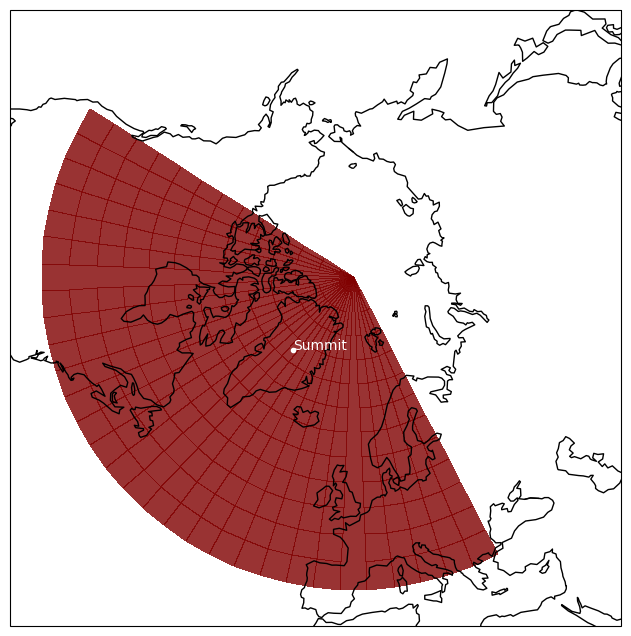

In [21]:
# Creating a mask of the back-trajectory region from Shuting's 2021 paper

mask_shuting = np.sum(pi_SO4,axis=0)*0
mask_shuting[:,33:46,12:42] = 1
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(projection=ccrs.NorthPolarStereo())
a=10

dr_s,lon = add_cyclic_point(mask_shuting.isel(lev=0), coord=novolc_SpeciesConc.AREA.lon)

color_norm = mpl.colors.LogNorm(vmin=0.001,vmax=0.1)

# 72.5796° N, 38.4592° W are the coordinates of Summit, Greenland
ax.pcolormesh(lon,novolc_SpeciesConc.AREA.lat,dr_s,cmap='jet',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax.plot(-40, 74, 'wo', markersize=3, transform=ccrs.PlateCarree())
ax.text(-40, 74, 'Summit', transform=ccrs.PlateCarree(),fontsize = 10,color='w')
ax.set_extent([-140, 50, 35, 90], crs=ccrs.PlateCarree())

ax.coastlines()


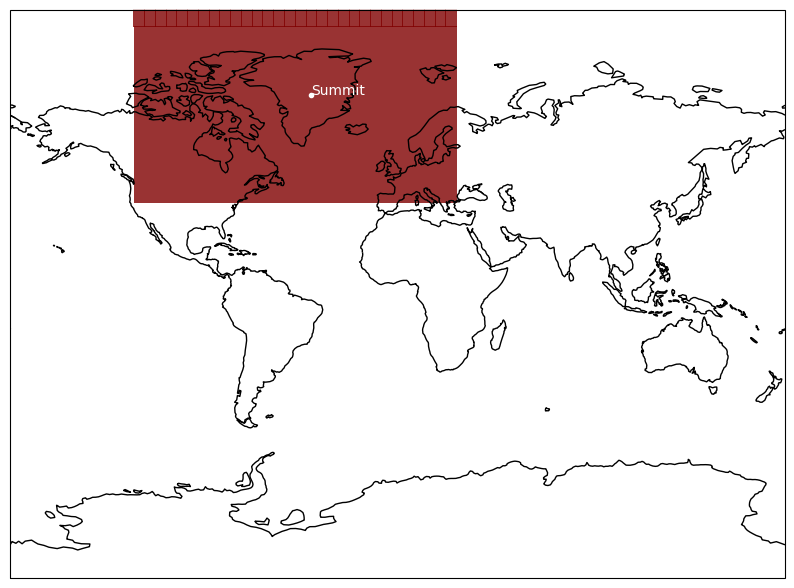

In [22]:
# Looking at the same mask with a non-polar projection

mask_shuting = np.sum(pi_SO4,axis=0)*0
mask_shuting[:,33:46,12:42] = 1
# mask_shuting[:,38:46,:] = 1

mask_low = mask_shuting*(boxht.isel(time=0)<500).transpose("lev","lat","lon")

fig = plt.figure(figsize=[10,8])
ax = plt.subplot(projection=ccrs.Miller())
a=10

dr_s,lon = add_cyclic_point(mask_shuting.isel(lev=0), coord=novolc_SpeciesConc.AREA.lon)

color_norm = mpl.colors.LogNorm(vmin=0.001,vmax=0.1)

# 72.5796° N, 38.4592° W are the coordinates of Summit, Greenland
ax.pcolormesh(lon,novolc_SpeciesConc.AREA.lat,dr_s,cmap='jet',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax.plot(-40, 74, 'wo', markersize=3, transform=ccrs.PlateCarree())
ax.text(-40, 74, 'Summit', transform=ccrs.PlateCarree(),fontsize = 10,color='w')
# ax.set_extent([-140, 50, 35, 90], crs=ccrs.PlateCarree())
ax.coastlines()


In [23]:
# Creating a mask to allow me to calculate an area-weighted fraction because not all grid cells have equal area

mask_area_fraction = ((mask_low>0)*novolc_SpeciesConc.AREA)/np.sum((mask_low>0)*novolc_SpeciesConc.AREA)

# Creating a mask that allows me to multiply with 4-D arrays (i.e. across all time slices or all months)
mask_alltime = pi_h2s_SO4*0+mask_shuting

## Volcanic sulfur burden fraction

In [24]:
# Calculating volcanic sulfur fractions in each grid cell and time slice

frac_volc_SO2 = (pi_SO2_burden_nolev_S-novolc_SO2_burden_nolev_S)/pi_SO2_burden_nolev_S
frac_volc_SO4 = (pi_SO4_burden_nolev_S-novolc_SO4_burden_nolev_S)/pi_SO4_burden_nolev_S
frac_volc_SO2SO4 = 1-(novolc_SO4_burden_nolev_S+novolc_SO2_burden_nolev_S)/(pi_SO4_burden_nolev_S+pi_SO2_burden_nolev_S)
# met07_frac_volc_SO2SO4 = 1-(met07_novolc_SO4_burden_nolev_S+met07_novolc_SO2_burden_nolev_S)/(met07_volc_SO4_burden_nolev_S+met07_volc_SO2_burden_nolev_S)
# iceland_frac_volc_SO2SO4 = 1-(novolc_SO4_burden_nolev_S+novolc_SO2_burden_nolev_S)/(iceland_SO4_burden_nolev_S+iceland_SO2_burden_nolev_S)

# fischer_frac_volc_SO2SO4 = 1-(novolc_SO4_burden_nolev_S+novolc_SO2_burden_nolev_S)/(Fischer_volc_SO4_burden_nolev_S+Fischer_volc_SO2_burden_nolev_S)
pi_h2s_frac_volc_SO2SO4 = 1-(novolc_SO4_burden_nolev_S+novolc_SO2_burden_nolev_S)/(pi_h2s_SO4_burden_nolev_S+pi_h2s_SO2_burden_nolev_S)
pi_h2s_17_frac_volc_SO2SO4 = 1-(novolc_SO4_burden_nolev_S+novolc_SO2_burden_nolev_S)/(pi_h2s_17_SO4_burden_nolev_S+pi_h2s_17_SO2_burden_nolev_S)



In [25]:
area = pi_StateMet.AREA
arcticA = area*mask_shuting.isel(lev=0)
A = np.sum(arcticA)

In [26]:
# Weighting time slices by length of month since some months are shorter than others
month_weights = np.array([31,28,31,30,31,30,31,31,30,31,30,31])/365

novolcSO2_wtdall = np.sum(np.sum(np.sum(novolc_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
novolcSO4_wtdall = np.sum(np.sum(np.sum(novolc_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

piSO2_wtdall = np.sum(np.sum(np.sum(pi_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
piSO4_wtdall = np.sum(np.sum(np.sum(pi_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

piSO2_wtdall = np.sum((pi_SO2_burden_nolev_S*arcticA/A).sum(dim=('lat','lon'))*month_weights)
novolcSO2_wtdall = np.sum((novolc_SO2_burden_nolev_S*arcticA/A).sum(dim=('lat','lon'))*month_weights)
piSO4_wtdall = np.sum((pi_SO4_burden_nolev_S*arcticA/A).sum(dim=('lat','lon'))*month_weights)
novolcSO4_wtdall = np.sum((novolc_SO4_burden_nolev_S*arcticA/A).sum(dim=('lat','lon'))*month_weights)

# method 1 of calculating volcanic sulfur fraction
Preindust_volcfrac = 1-(novolcSO2_wtdall+novolcSO4_wtdall)/(piSO2_wtdall+piSO4_wtdall)

# method 2 of calculating volcanic sulfur fraction
# Preindust_volcfrac = np.round(np.sum(np.mean(frac_volc_SO2SO4,axis=0)*arcticA/A),2)

# both methods give the same answer (hopefully) (they do)
print('The volcanic sulfur fraction (SO2 + SO4) during the standard preindustrial run is: ',Preindust_volcfrac.values)


The volcanic sulfur fraction (SO2 + SO4) during the standard preindustrial run is:  0.33828164073426625


In [27]:
month_weights = np.array([31,28,31,30,31,30,31,31,30,31,30,31])/365

novolcSO2_wtdall = np.sum(np.sum(np.sum(novolc_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
novolcSO4_wtdall = np.sum(np.sum(np.sum(novolc_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

iceland_SO2_wtdall = np.sum(np.sum(np.sum(iceland_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
iceland_SO4_wtdall = np.sum(np.sum(np.sum(iceland_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

iceland_SO2_wtdall = np.sum((iceland_SO2_burden_nolev_S*arcticA/A).sum(dim=('lat','lon'))*month_weights)
novolcSO2_wtdall = np.sum((novolc_SO2_burden_nolev_S*arcticA/A).sum(dim=('lat','lon'))*month_weights)
iceland_SO4_wtdall = np.sum((iceland_SO4_burden_nolev_S*arcticA/A).sum(dim=('lat','lon'))*month_weights)
novolcSO4_wtdall = np.sum((novolc_SO4_burden_nolev_S*arcticA/A).sum(dim=('lat','lon'))*month_weights)

# method 1
Preindust_iceland_volcfrac = 1-(novolcSO2_wtdall+novolcSO4_wtdall)/(iceland_SO2_wtdall+iceland_SO4_wtdall)

# method 2
# Preindust_volcfrac = np.round(np.sum(np.mean(frac_volc_SO2SO4,axis=0)*arcticA/A),2)

# both methods give the same answer (hopefully)
print('The volcanic sulfur fraction (SO2 + SO4) during the iceland preindustrial run is: ',Preindust_iceland_volcfrac.values)


The volcanic sulfur fraction (SO2 + SO4) during the iceland preindustrial run is:  0.8823680914536349


In [28]:
month_weights = np.array([31,28,31,30,31,30,31,31,30,31,30,31])/365

met07_novolcSO2_wtdall = np.sum(np.sum(np.sum(met07_novolc_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
met07_novolcSO4_wtdall = np.sum(np.sum(np.sum(met07_novolc_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

met07_volcSO2_wtdall = np.sum(np.sum(np.sum(met07_volc_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
met07_volcSO4_wtdall = np.sum(np.sum(np.sum(met07_volc_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

# method 1
Preindust_volcfrac_07 = 1-(met07_novolcSO2_wtdall+met07_novolcSO4_wtdall)/(met07_volcSO2_wtdall+met07_volcSO4_wtdall)

# method 2
# Preindust_volcfrac_07 = np.round(np.sum(np.mean(met07_frac_volc_SO2SO4,axis=0)*arcticA/A),2)

# both methods give the same answer (hopefully)
print('The volcanic sulfur fraction (SO2 + SO4) during the preindustrial run with 2007 meteorology is: ',Preindust_volcfrac_07.values)


The volcanic sulfur fraction (SO2 + SO4) during the preindustrial run with 2007 meteorology is:  0.27495489745945223


Divide the sulfur (SO2 + SO4) burden in the "no volc" run by the sulfur burden in the Preindustrial run and do the same for the Fischer run

In [29]:
# method 1

novolcSO2_wtdall = np.sum(np.sum(np.sum(novolc_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
novolcSO4_wtdall = np.sum(np.sum(np.sum(novolc_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

fischervolc_SO2_wtdall = np.sum(np.sum(np.sum(fischer_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
fischervolc_SO4_wtdall = np.sum(np.sum(np.sum(fischer_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

fischer_volcfrac = np.round(1-(novolcSO2_wtdall+novolcSO4_wtdall)/(fischervolc_SO2_wtdall+fischervolc_SO4_wtdall),2)

print('The volcanic sulfur fraction (SO2 + SO4) in the Fischer scenario preindustrial run is: ',fischer_volcfrac.values)


The volcanic sulfur fraction (SO2 + SO4) in the Fischer scenario preindustrial run is:  0.36


In [30]:
# method 1

novolcSO2_wtdall = np.sum(np.sum(np.sum(novolc_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
novolcSO4_wtdall = np.sum(np.sum(np.sum(novolc_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

pi_h2s_SO2_wtdall = np.sum(np.sum(np.sum(pi_h2s_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
pi_h2s_SO4_wtdall = np.sum(np.sum(np.sum(pi_h2s_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

pi_h2s_volcfrac = np.round(1-(novolcSO2_wtdall+novolcSO4_wtdall)/(pi_h2s_SO2_wtdall+pi_h2s_SO4_wtdall),2)

print('The volcanic sulfur fraction (SO2 + SO4) during the H2S preindustrial run is: ',pi_h2s_volcfrac.values)


The volcanic sulfur fraction (SO2 + SO4) during the H2S preindustrial run is:  0.46


In [31]:
novolcSO2_wtdall = np.sum(np.sum(np.sum(novolc_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
novolcSO4_wtdall = np.sum(np.sum(np.sum(novolc_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

pi_h2s_17_SO2_wtdall = np.sum(np.sum(np.sum(pi_h2s_17_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
pi_h2s_17_SO4_wtdall = np.sum(np.sum(np.sum(pi_h2s_17_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

pi_h2s_17_volcfrac = np.round(1-(novolcSO2_wtdall+novolcSO4_wtdall)/(pi_h2s_17_SO2_wtdall+pi_h2s_17_SO4_wtdall),2)

# method  1 gives a different answer, I trust it more because it's a more iterative approach, but should check on this
print('The volcanic sulfur fraction (SO2 + SO4) during the Jongebloed preindustrial run is: ',pi_h2s_17_volcfrac.values)


The volcanic sulfur fraction (SO2 + SO4) during the Jongebloed preindustrial run is:  0.61


In [32]:
# Let's assume the formation of HPMTF reduces total SO2 and SO4 by 10% and all of that loss is lost from 
# biogenic sulfate, how does that change sulfur fraction in ice core?

month_weights = np.array([31,28,31,30,31,30,31,31,30,31,30,31])/365

novolcSO2_wtdall = np.sum(np.sum(np.sum(novolc_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
novolcSO4_wtdall = np.sum(np.sum(np.sum(novolc_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

piSO2_wtdall = np.sum(np.sum(np.sum(pi_SO2_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)
piSO4_wtdall = np.sum(np.sum(np.sum(pi_SO4_burden_nolev_S*arcticA/A,axis=1),axis=1)*month_weights)

# method 1
Preindust_volcfrac = 1-(novolcSO2_wtdall+novolcSO4_wtdall)/(piSO2_wtdall+piSO4_wtdall)

# subtract 10% from total and 10% of total volc from no volc:
subtract_portion = 0.10 * (piSO2_wtdall+piSO4_wtdall)

Preindust_volcfrac_HPMTF = 1-(novolcSO2_wtdall+novolcSO4_wtdall - subtract_portion)/(piSO2_wtdall+piSO4_wtdall - subtract_portion)

# now we just assume a decrease in biogenic SO2 of 40%
decrease_portion = 0.40 * (novolcSO2_wtdall+novolcSO4_wtdall)
Preindust_volcfrac_HPMTF2 = 1-(novolcSO2_wtdall+novolcSO4_wtdall - decrease_portion)/(piSO2_wtdall+piSO4_wtdall - decrease_portion)


# both methods give the same answer (hopefully)
print('The volcanic sulfur fraction (SO2 + SO4) during the standard preindustrial would be: ',Preindust_volcfrac_HPMTF.values)


The volcanic sulfur fraction (SO2 + SO4) during the standard preindustrial would be:  0.3758684902421664


# PLOTTING FIGURE 2

Text(0.03, 0.06, '$f_{volc}$ = 61%')

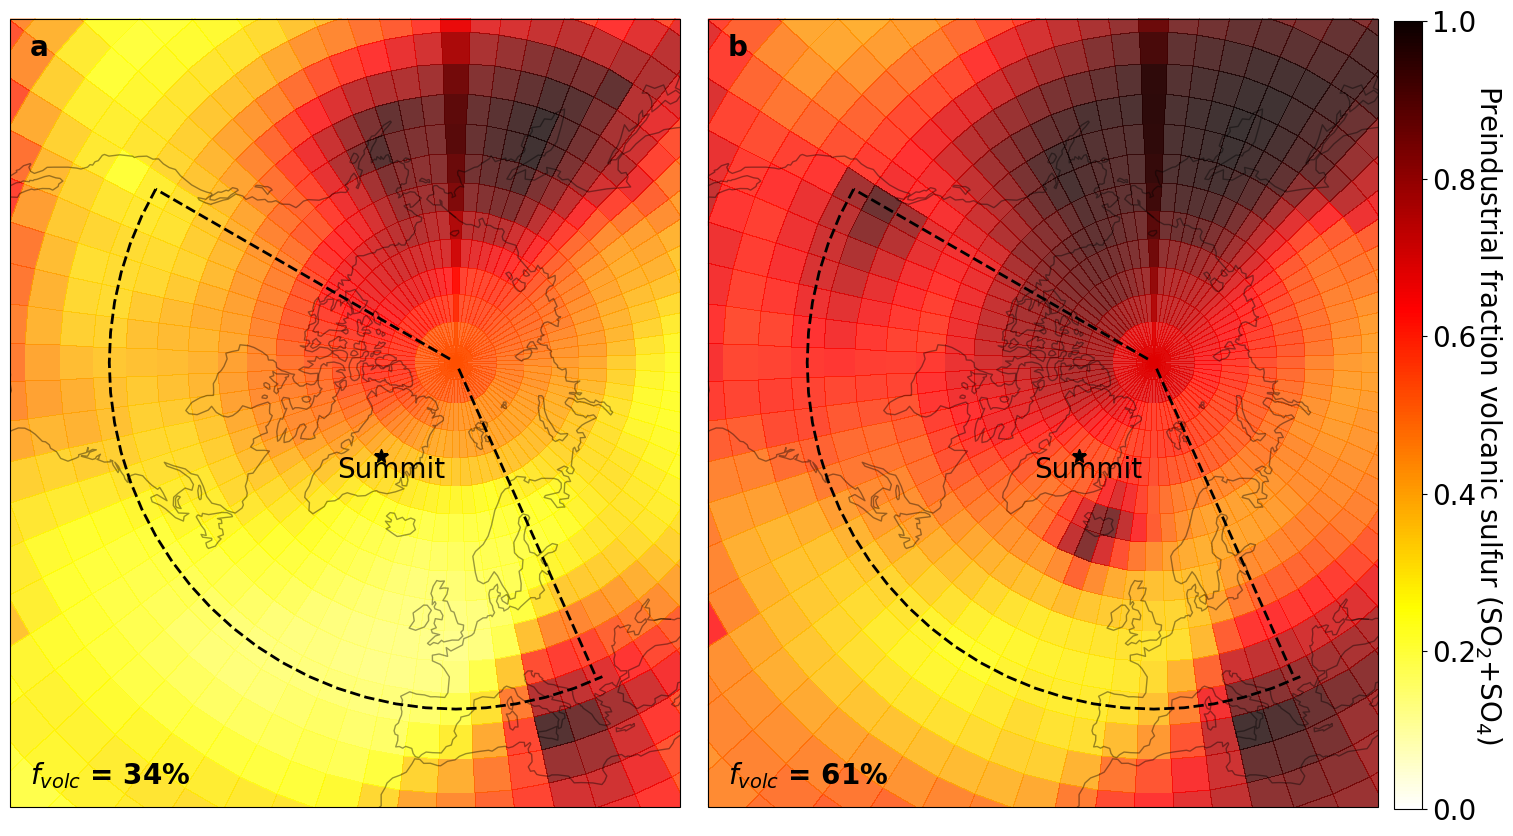

In [33]:
# using pcolormesh

fig,ax = plt.subplots(ncols=2,nrows=1,figsize=[14,8])
ax[0] = plt.subplot(121,projection=ccrs.NorthPolarStereo(),position=[0,0,0.4,0.8])
ax[1] = plt.subplot(122,projection=ccrs.NorthPolarStereo(),position=[0.402,0,0.4,0.8])
a=10
dr_s1,lon = add_cyclic_point(np.mean(frac_volc_SO2SO4,axis=0), coord=frac_volc_SO2SO4.lon)
dr_s2,lon = add_cyclic_point(np.mean(pi_h2s_17_frac_volc_SO2SO4,axis=0), coord=pi_h2s_17_frac_volc_SO2SO4.lon)

color_norm = mpl.colors.Normalize(vmin=0,vmax=1)
llon, llat = np.meshgrid(lon[12:42],novolc_SpeciesConc.AREA.lat[33:46])

j=20
z=5
m=10
l=2

ax[0].pcolormesh(lon,pi_h2s_17_frac_volc_SO2SO4.lat,dr_s1,cmap='hot_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[0].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=l,linestyles=['--'],zorder=z)
ax[0].contour(llon,llat,llon,levels=[80],colors='k',transform=ccrs.PlateCarree(),linewidths=l,linestyles=['--'],zorder=z)
ax[0].contour(llon,llat,llon,levels=[24],colors='k',transform=ccrs.PlateCarree(),linewidths=l,linestyles=['--'],zorder=z)
ax[0].plot(-38.62, 72.58, 'k*', markersize=m, transform=ccrs.PlateCarree())
ax[0].text(-46, 66, 'Summit', transform=ccrs.PlateCarree(),fontsize = j,color='k')
ax[0].set_extent([-140, 30, 30, 90], crs=ccrs.PlateCarree())
ax[0].coastlines(alpha=0.4)

ax[1].pcolormesh(lon,pi_h2s_17_frac_volc_SO2SO4.lat,dr_s2,cmap='hot_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[1].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=l,linestyles=['--'],zorder=z)
ax[1].contour(llon,llat,llon,levels=[80],colors='k',transform=ccrs.PlateCarree(),linewidths=l,linestyles=['--'],zorder=z)
ax[1].contour(llon,llat,llon,levels=[24],colors='k',transform=ccrs.PlateCarree(),linewidths=l,linestyles=['--'],zorder=z)
ax[1].plot(-38.62, 72.58, 'k*', markersize=m, transform=ccrs.PlateCarree())
ax[1].text(-46, 66, 'Summit', transform=ccrs.PlateCarree(),fontsize = j,color='k')
ax[1].set_extent([-140, 30, 30, 90], crs=ccrs.PlateCarree())
ax[1].coastlines(alpha=0.4)

dm_nit = plt.cm.ScalarMappable(cmap='hot_r',norm=color_norm)
dm_nit.set_array([])
cax = plt.axes([1, 0.005, 0.02, 0.985])
cbar = plt.colorbar(dm_nit, orientation = 'vertical', cax=cax)
cbar.set_label('Preindustrial fraction volcanic sulfur (SO$_2$+SO$_4$)', rotation=270,labelpad=20,fontsize=j)

plt.subplots_adjust(bottom=0, right=1, left=0.1, top=1)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tick_params(labelsize=j)

ax[0].text(0.03, 0.98, 'a', transform=ax[0].transAxes,fontsize=j, fontweight='bold', va='top')
ax[1].text(0.03, 0.98, 'b', transform=ax[1].transAxes,fontsize=j, fontweight='bold', va='top')

ax[0].text(0.03, 0.06, '$f_{volc}$ = 34%', transform=ax[0].transAxes,fontsize=j, fontweight='bold', va='top')
ax[1].text(0.03, 0.06, '$f_{volc}$ = 61%', transform=ax[1].transAxes,fontsize=j, fontweight='bold', va='top')

Text(0.03, 0.03, '$f_{volc}$ = 61%')

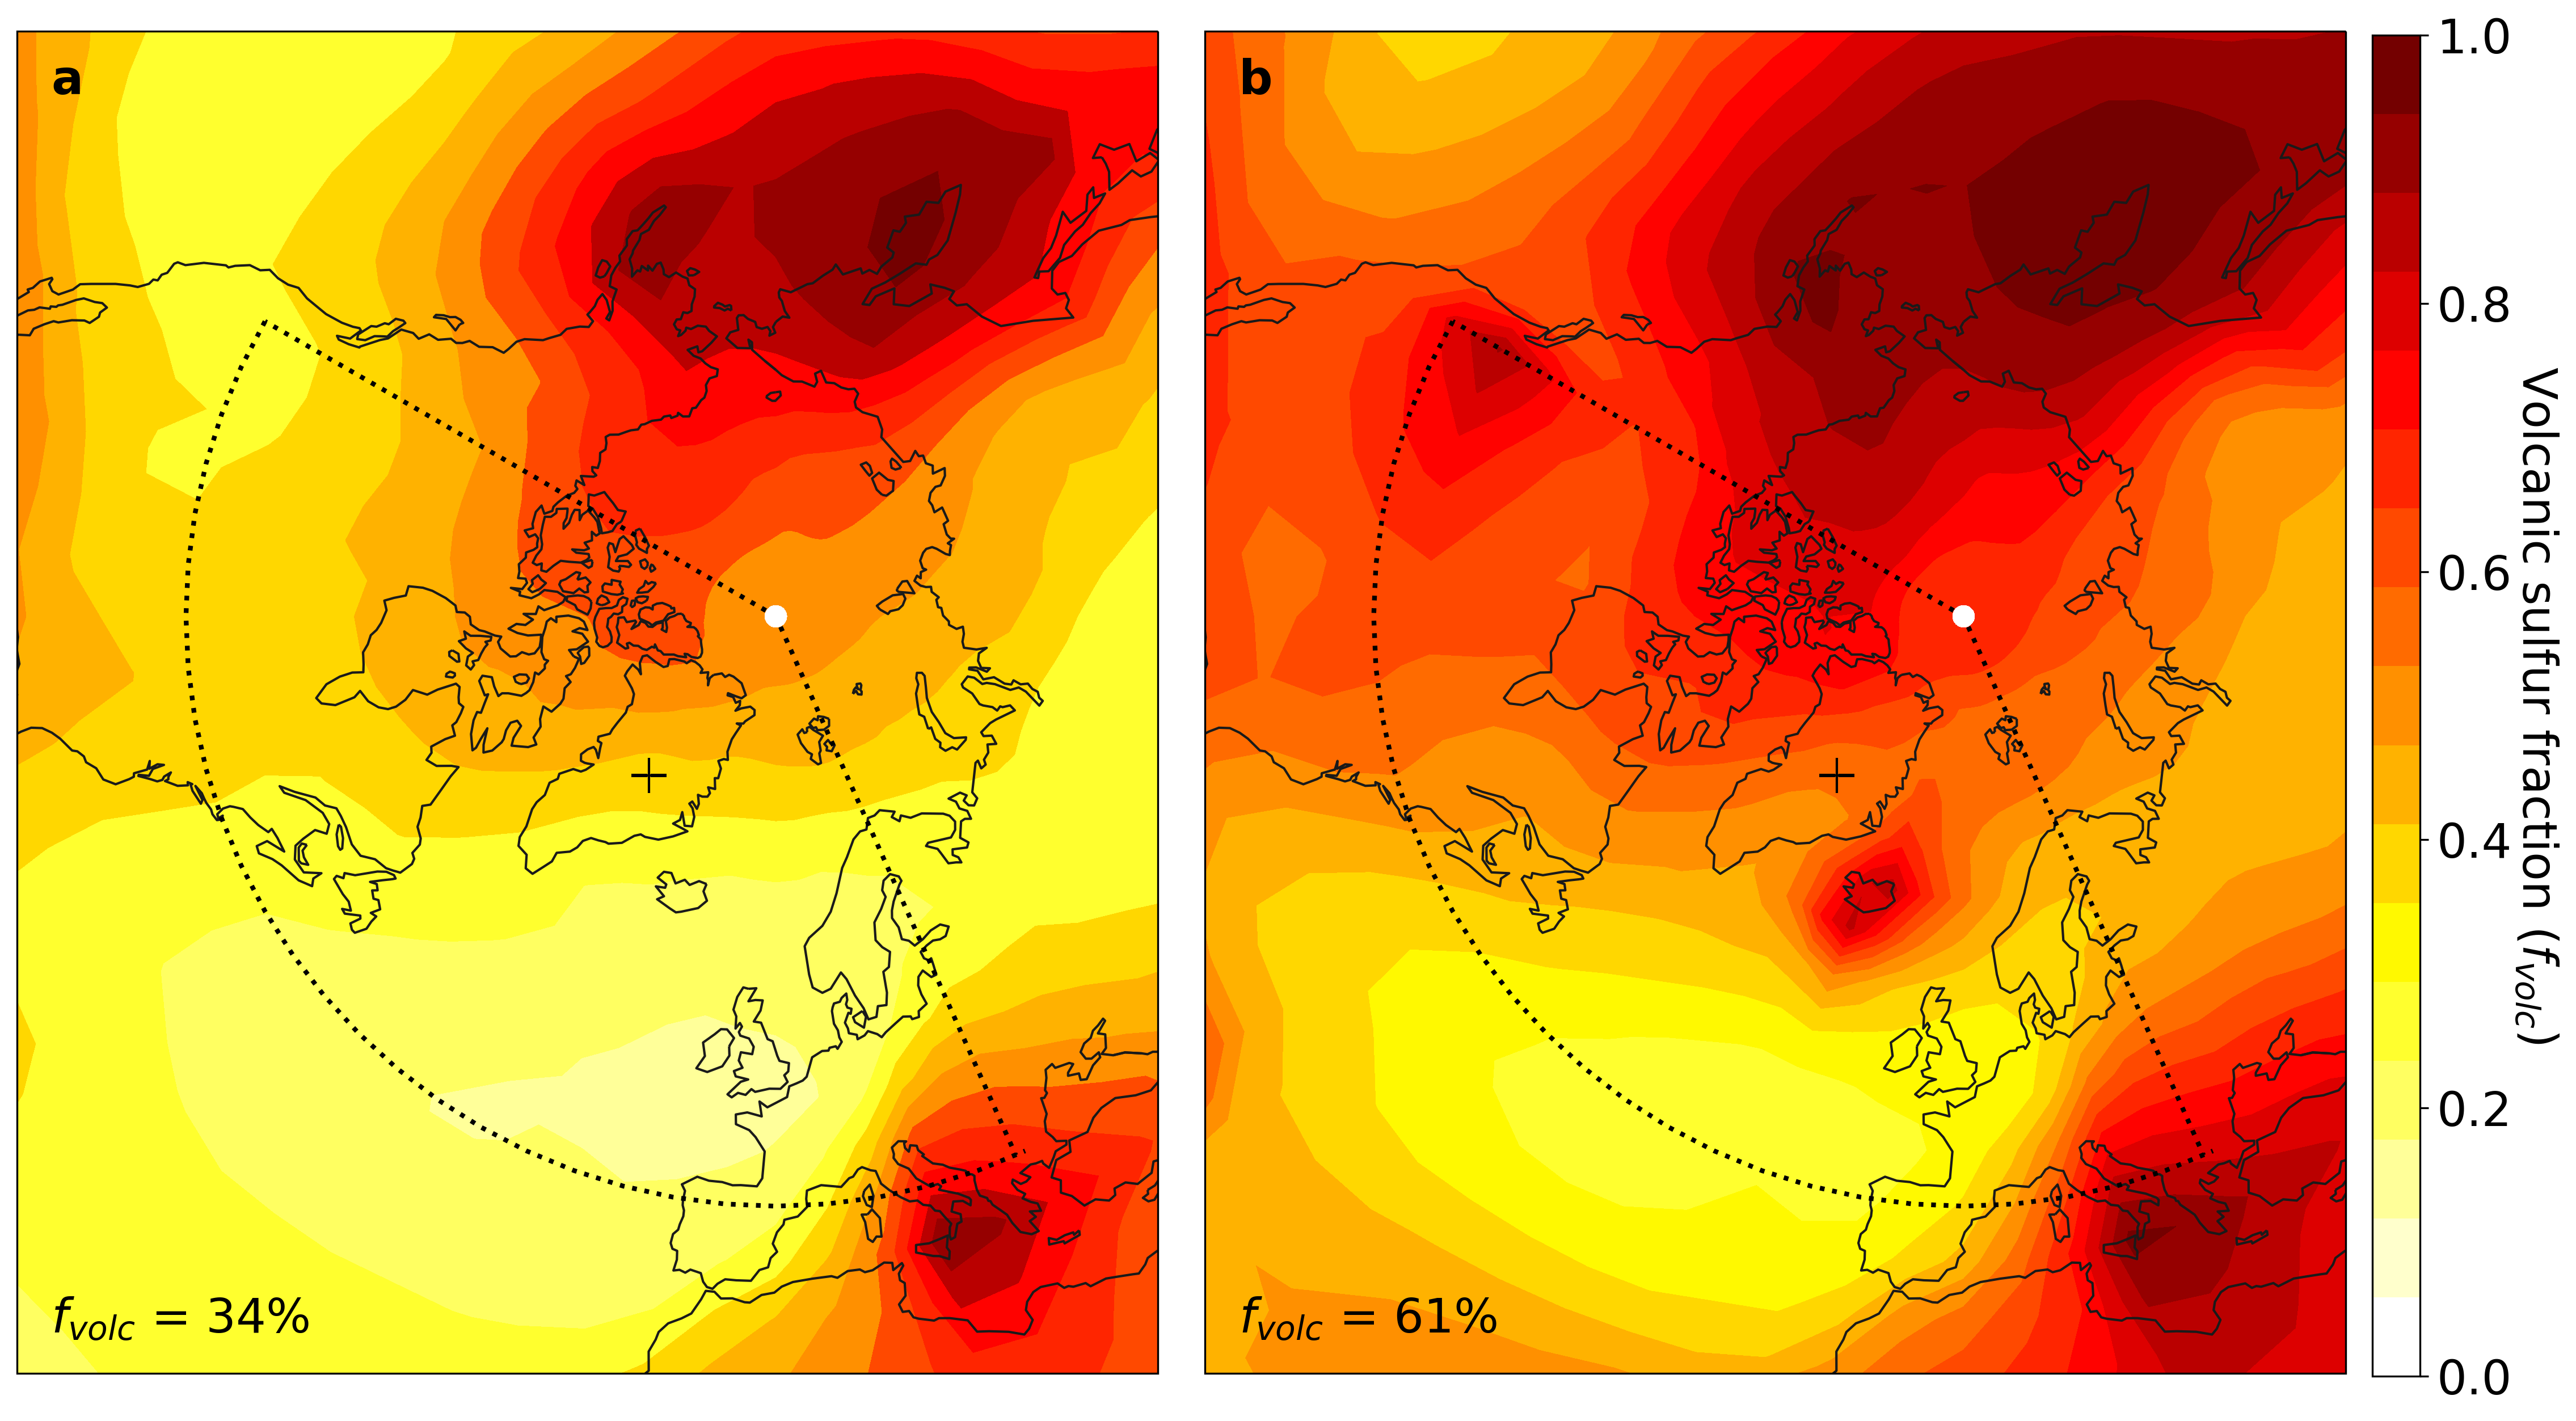

In [34]:
# Using contourf because it looks more professional

fig,ax = plt.subplots(ncols=2,nrows=1,figsize=[14,8],dpi=300)
ax[0] = plt.subplot(121,projection=ccrs.NorthPolarStereo(),position=[0,0,0.4,0.8])
ax[1] = plt.subplot(122,projection=ccrs.NorthPolarStereo(),position=[0.402,0,0.4,0.8])
a=10
dr_s1,lon = add_cyclic_point(np.mean(frac_volc_SO2SO4,axis=0), coord=frac_volc_SO2SO4.lon)
dr_s2,lon = add_cyclic_point(np.mean(pi_h2s_17_frac_volc_SO2SO4,axis=0), coord=pi_h2s_17_frac_volc_SO2SO4.lon)

cmap = mpl.cm.hot_r(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[0:17])
color_norm = mpl.colors.Normalize(vmin=0,vmax=1.0)
llon, llat = np.meshgrid(lon[12:42],novolc_SpeciesConc.AREA.lat[33:46])

j=20
z=5
m=10
l=2

# ax[0].pcolormesh(lon,pi_h2s_17_frac_volc_SO2SO4.lat,dr_s1,cmap='hot_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[0].contourf(lon,pi_h2s_17_frac_volc_SO2SO4.lat,dr_s1,
                 cmap=cmap,norm=color_norm,levels=15,
                 transform=ccrs.PlateCarree(),alpha=1)
ax[0].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=l,linestyles=[':'],zorder=z)
ax[0].contour(llon,llat,llon,levels=[80],colors='k',transform=ccrs.PlateCarree(),linewidths=l,linestyles=[':'],zorder=z)
ax[0].contour(llon,llat,llon,levels=[24],colors='k',transform=ccrs.PlateCarree(),linewidths=l,linestyles=[':'],zorder=z)
ax[0].plot(-38.62, 72.58, '+', color='k',markersize=m*1.5, transform=ccrs.PlateCarree())
# ax[0].text(-46, 65, 'Summit', transform=ccrs.PlateCarree(),fontsize = j,color='k')
ax[0].set_extent([-140, 30, 30, 90], crs=ccrs.PlateCarree())
ax[0].coastlines(alpha=1,zorder=2,color='0.1')

# ax[1].pcolormesh(lon,pi_h2s_17_frac_volc_SO2SO4.lat,dr_s2,
#                  cmap='hot_r',norm=color_norm,
#                  transform=ccrs.PlateCarree(),alpha=1)
ax[1].contourf(lon,pi_h2s_17_frac_volc_SO2SO4.lat,dr_s2,
                 cmap=cmap,norm=color_norm,levels=15,
                 transform=ccrs.PlateCarree(),alpha=1)
ax[1].contour(llon,llat,llat,levels=[40],colors='k',transform=ccrs.PlateCarree(),linewidths=l,linestyles=[':'],zorder=z)
ax[1].contour(llon,llat,llon,levels=[80],colors='k',transform=ccrs.PlateCarree(),linewidths=l,linestyles=[':'],zorder=z)
ax[1].contour(llon,llat,llon,levels=[24],colors='k',transform=ccrs.PlateCarree(),linewidths=l,linestyles=[':'],zorder=z)
ax[1].plot(-38.62, 72.58, '+',color='k', markersize=m*1.5, lw=2, 
           transform=ccrs.PlateCarree())
# ax[1].text(-46, 65, 'Summit', transform=ccrs.PlateCarree(),fontsize = j,color='k')
ax[1].set_extent([-140, 30, 30, 90], crs=ccrs.PlateCarree())
ax[1].coastlines(alpha=1,zorder=2,color='0.1')

dm_nit = plt.cm.ScalarMappable(cmap=cmap,norm=color_norm)
dm_nit.set_array([])
cax = plt.axes([1, 0.005, 0.02, 0.985])
cbar = plt.colorbar(dm_nit, orientation = 'vertical', cax=cax)
cbar.set_label('Volcanic sulfur fraction ($f_{volc}$)', rotation=270,labelpad=20,fontsize=j)

plt.subplots_adjust(bottom=0, right=1, left=0.1, top=1)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tick_params(labelsize=j)

ax[0].text(0.03, 0.98, 'a', transform=ax[0].transAxes,fontsize=j, fontweight='bold', va='top')
ax[1].text(0.03, 0.98, 'b', transform=ax[1].transAxes,fontsize=j, fontweight='bold', va='top')

ax[0].text(0.03, 0.03, '$f_{volc}$ = 34%', transform=ax[0].transAxes,fontsize=j)# fontweight='bold', va='top')
ax[1].text(0.03, 0.03, '$f_{volc}$ = 61%', transform=ax[1].transAxes,fontsize=j)# fontweight='bold', va='top')

# fig.savefig('/home/cindylou/ujongebl/Notebooks/VolcanicS_GC_results/Fig3.pdf')

## MSA to biogenic SO4 ratio in model to compare to ice core

In [35]:
MSA_frac=novolc_MSA_burden_nolev_S/(novolc_SO4_burden_nolev_S+novolc_SO2_burden_nolev_S)
Preindust_MSA_frac = np.round(np.sum(np.mean(MSA_frac,axis=0)*arcticA/A).values,2)

print('Model MSA to biogenic SO2 + SO4 fraction  = ',Preindust_MSA_frac)

Model MSA to biogenic SO2 + SO4 fraction  =  0.11


## Analyzing Volcanic Sulfur by Altitude

Calculate a new volcanic sulfur fraction with a lower atmospheric cut-off (i.e. below tropopause)

In [36]:
mask_greenland = np.sum(pi_SO4,axis=0)*0
mask_greenland[:,37:43,22:32] = 1
mask_greenland[:,37:41,21:25] = 0
mask_greenland[:,37:39,28:32] = 0
mask_greenland[:,38:39,28:29] = 1
mask_greenland[:,37:38,25:26] = 0
mask_greenland = np.sum(pi_SO4,axis=0)*0
mask_greenland[:,37:43,25:32] = 1

mask_snowflake = np.sum(pi_SO4,axis=0)*0
mask_snowflake[:,35:46,18:35] = 1

shuting_mask = np.sum(pi_SO4,axis=0)*0
shuting_mask[:,33:46,12:42] = 1

mask_small = np.sum(pi_SO4,axis=0)*0
mask_small[:,40:42,27:29] = 1

In [37]:
altitudes = np.array([80.581,78.146,76.357,74.594,73.18,71.812,70.657,69.44,68.392,67.243,
                      66.245,65.115,64.13,63.004,62.021,60.902,59.924,58.816,57.846,56.752,
                      55.794,54.717,53.773,52.716,51.788,50.754,49.844,48.835,47.946,46.962,
                      46.092,45.134,44.286,43.355,42.529,41.627,40.825,39.951,39.173,38.328,
                      37.574,36.759,36.03,35.244,34.539,33.782,33.101,32.372,31.716,31.015,
                      30.382,29.701,29.085,28.423,27.824,27.18,26.596,25.971,25.402,24.794,
                      24.24,23.648,23.108,22.531,22.004,21.438,20.92,20.364,19.855,19.309,
                      18.807,18.269,17.773,17.243,16.753,16.222,15.731,15.198,14.706,14.17,
                      13.674,13.134,12.633,12.086,11.578,11.021,10.504,9.936,9.409,8.846,8.32,
                      7.943,7.582,7.237,6.905,6.585,6.277,5.98,5.692,5.413,5.142,4.879,4.623,
                      4.375,4.132,3.896,3.665,3.439,3.219,3.074,2.932,2.792,2.654,2.517,2.382,
                      2.249,2.118,1.988,1.86,1.759,1.659,1.584,1.51,1.436,1.363,1.29,1.218,
                      1.146,1.075,1.004,0.934,0.864,0.795,0.726,0.657,0.589,0.521,0.454,0.387,
                      0.32,0.254,0.189,0.123,0.058,-0.006])[1::2][::-1]
np.shape(altitudes)

(72,)

In [38]:
# Calculate MASKED burden for no volc

novolc_SO4 = novolc_SpeciesConc['SpeciesConc_SO4'] #.isel(time=no28)
novolc_SO4['lev'] = np.arange(72)
novolc_SO2 = novolc_SpeciesConc['SpeciesConc_SO2']
novolc_SO2['lev'] = np.arange(72)

novolc_AD = novolc_StateMet.Met_AD
novolc_AD['lev'] = np.arange(72)

novolc_SO4_burden_S = novolc_SO4 * novolc_AD * 32/28.97
novolc_SO2_burden_S = novolc_SO2 * novolc_AD * 32/28.97
novolc_MSA_burden_S = novolc_MSA * novolc_AD * 32/28.97
novolc_DMS_burden_S = novolc_DMS * novolc_AD * 32/28.97

novolc_SO4_burden_nolev_S = np.sum(novolc_SO4_burden_S,axis=1)
novolc_SO2_burden_nolev_S = np.sum(novolc_SO2_burden_S,axis=1)
novolc_MSA_burden_nolev_S = np.sum(novolc_MSA_burden_S,axis=1)
novolc_DMS_burden_nolev_S = np.sum(novolc_DMS_burden_S,axis=1)


# Calculate burden for PI run

pi_SO4 = pi_SpeciesConc['SpeciesConc_SO4']
pi_SO4['lev'] = np.arange(72)
pi_SO2 = pi_SpeciesConc['SpeciesConc_SO2']
pi_SO2['lev'] = np.arange(72)

pi_AD = pi_StateMet.Met_AD
pi_AD['lev'] = np.arange(72)

pi_SO4_burden_S = pi_SO4 * pi_AD * 32/28.97
pi_SO2_burden_S = pi_SO2 * pi_AD * 32/28.97
pi_MSA_burden_S = pi_MSA * pi_AD * 32/28.97
pi_DMS_burden_S = pi_DMS * pi_AD * 32/28.97

(0.0, 1.0)

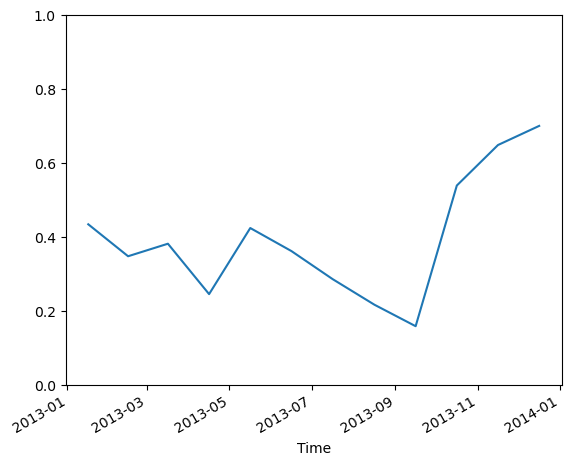

In [39]:
# Decide on atmospheric level. 2,000 m = level 14; 4,000 m = level 20; 6,000 m = level 24; trop = level 28 ish
l1 = 20
l2 = 24
piSO4_vert_burden = ((pi_SO4_burden_S[:,l1:l2:,37:43,25:32] * area[37:43,25:32]).sum(dim=('lat','lon'))/np.sum(area[37:43,25:32])).sum(dim=('lev'))
piSO2_vert_burden = ((pi_SO2_burden_S[:,l1:l2,37:43,25:32] * area[37:43,25:32]).sum(dim=('lat','lon'))/np.sum(area[37:43,25:32])).sum(dim=('lev'))

novolcSO4_vert_burden = ((novolc_SO4_burden_S[:,l1:l2,37:43,25:32] * area[37:43,25:32]).sum(dim=('lat','lon'))/np.sum(area[37:43,25:32])).sum(dim=('lev'))
novolcSO2_vert_burden = ((novolc_SO2_burden_S[:,l1:l2,37:43,25:32] * area[37:43,25:32]).sum(dim=('lat','lon'))/np.sum(area[37:43,25:32])).sum(dim=('lev'))

pi_sulfur_fraction = 1 - (novolcSO4_vert_burden + novolcSO2_vert_burden)/(piSO4_vert_burden + piSO2_vert_burden)

pi_sulfur_fraction.plot()
plt.ylim([0,1])

In [40]:
# Calculate vertical profile of Fischer volc
# First, create mask of all levels

mask4 = np.sum(fischer_SpeciesConc['SpeciesConc_SO4'],axis=0)*0
mask4[:,34:46,12:42] = 1
mask4[:,39:46,0:72] = 1
mask4[:,32:46,20:32] = 1
mask_alltime = fischer_SpeciesConc['SpeciesConc_SO4']*0+mask4

tropht = np.mean(np.mean(pi_StateMet.Met_TropHt.isel(lat=slice(37,46)),axis=0))

fischer_SO4 = fischer_SpeciesConc['SpeciesConc_SO4']
fischer_SO2 = fischer_SpeciesConc['SpeciesConc_SO2']
fischer_AD = fischer_StateMet.Met_AD
masked_fischer_SO4_burden_S = np.sum(np.sum(fischer_SO4 * fischer_AD * mask_alltime * 32/28.97,axis=2),axis=2)
masked_fischer_SO2_burden_S = np.sum(np.sum(fischer_SO2 * fischer_AD * mask_alltime * 32/28.97,axis=2),axis=2)

pi_SO4 = pi_SpeciesConc['SpeciesConc_SO4']
pi_SO2 = pi_SpeciesConc['SpeciesConc_SO2']
pi_AD = pi_StateMet.Met_AD
masked_pi_SO4_burden_S = np.sum(np.sum(pi_SO4 * pi_AD * mask_alltime * 32/28.97,axis=2),axis=2)
masked_pi_SO2_burden_S = np.sum(np.sum(pi_SO2 * pi_AD * mask_alltime * 32/28.97,axis=2),axis=2)

novolc_SO4 = novolc_SpeciesConc['SpeciesConc_SO4']
novolc_SO2 = novolc_SpeciesConc['SpeciesConc_SO2']
novolc_AD = novolc_StateMet.Met_AD
masked_novolc_SO4_burden_S = np.sum(np.sum(novolc_SO4 * novolc_AD * mask_alltime * 32/28.97,axis=2),axis=2)
masked_novolc_SO2_burden_S = np.sum(np.sum(novolc_SO2 * novolc_AD * mask_alltime * 32/28.97,axis=2),axis=2)



In [41]:
# ((novolc_SO4 * novolc_AD)[:,33:46,12:42]*area[:,33:46,12:42]).sum(dim=('lat','lon'))

In [42]:
altitudes = np.array([80.581,78.146,76.357,74.594,73.18,71.812,70.657,69.44,68.392,67.243,
                      66.245,65.115,64.13,63.004,62.021,60.902,59.924,58.816,57.846,56.752,
                      55.794,54.717,53.773,52.716,51.788,50.754,49.844,48.835,47.946,46.962,
                      46.092,45.134,44.286,43.355,42.529,41.627,40.825,39.951,39.173,38.328,
                      37.574,36.759,36.03,35.244,34.539,33.782,33.101,32.372,31.716,31.015,
                      30.382,29.701,29.085,28.423,27.824,27.18,26.596,25.971,25.402,24.794,
                      24.24,23.648,23.108,22.531,22.004,21.438,20.92,20.364,19.855,19.309,
                      18.807,18.269,17.773,17.243,16.753,16.222,15.731,15.198,14.706,14.17,
                      13.674,13.134,12.633,12.086,11.578,11.021,10.504,9.936,9.409,8.846,8.32,
                      7.943,7.582,7.237,6.905,6.585,6.277,5.98,5.692,5.413,5.142,4.879,4.623,
                      4.375,4.132,3.896,3.665,3.439,3.219,3.074,2.932,2.792,2.654,2.517,2.382,
                      2.249,2.118,1.988,1.86,1.759,1.659,1.584,1.51,1.436,1.363,1.29,1.218,
                      1.146,1.075,1.004,0.934,0.864,0.795,0.726,0.657,0.589,0.521,0.454,0.387,
                      0.32,0.254,0.189,0.123,0.058,-0.006])[1::2][::-1]
np.shape(altitudes)

(72,)

In [43]:
# altitudes = np.array([80.581,72.180,68.392,63.053,59.924,54.834,51.788,47.135,44.286,40.166,37.574,
#                       34.024,31.716,28.654,26.596,25.307,24.240,23.020,22.004,20.836,19.855,18.727,
#                       17.773,17.243,16.753,16.222,15.731,15.198,14.706,14.170,13.674,13.134,12.633,
#                       12.086,11.578,11.021,10.504,9.936,9.409,8.846,8.320,7.943,7.582,7.237,6.905,6.585,
#                       6.277,5.980,5.692,5.413,5.142,4.879,4.623,4.375,4.132,3.896,3.665,3.439,3.219,
#                       3.074,2.932,2.792,2.654,2.517,2.382,2.249,2.118,1.988,1.860,1.759,1.659,1.584,
#                       1.510,1.436,1.363,1.290,1.218,1.146,1.075,1.004,0.934,0.864,0.795,0.726,0.657,
#                       0.589,0.521,0.454,0.387,0.320,0.254,0.189,0.123,0.058,-0.006])[1::2][::-1]
# altitudes

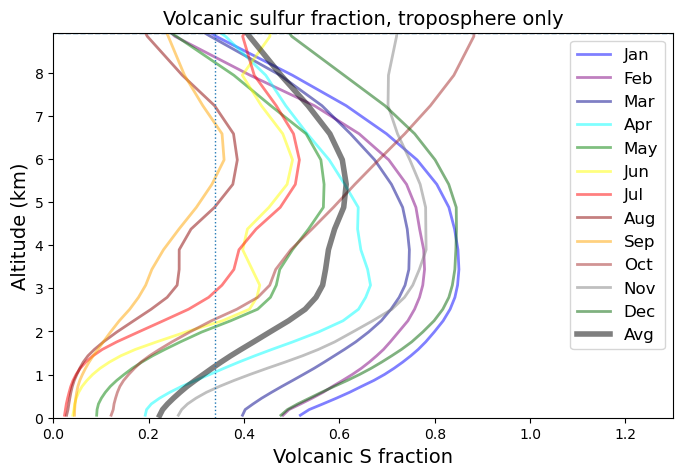

In [44]:
volc_sulfur_fraction = 1 - (masked_novolc_SO4_burden_S + masked_novolc_SO2_burden_S)/(masked_pi_SO4_burden_S + masked_pi_SO2_burden_S)

plt.figure(figsize=[8,5])
plt.plot(volc_sulfur_fraction.isel(time=0),altitudes,linewidth=2,color='blue',label='Jan',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=1),altitudes,linewidth=2,color='purple',label='Feb',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=2),altitudes,linewidth=2,color='darkblue',label='Mar',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=3),altitudes,linewidth=2,color='cyan',label='Apr',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=4),altitudes,linewidth=2,color='green',label='May',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=5),altitudes,linewidth=2,color='yellow',label='Jun',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=6),altitudes,linewidth=2,color='red',label='Jul',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=7),altitudes,linewidth=2,color='darkred',label='Aug',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=8),altitudes,linewidth=2,color='orange',label='Sep',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=9),altitudes,linewidth=2,color='brown',label='Oct',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=10),altitudes,linewidth=2,color='gray',label='Nov',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=11),altitudes,linewidth=2,color='darkgreen',label='Dec',alpha=0.5)
plt.plot(np.mean(volc_sulfur_fraction,axis=0),altitudes,linewidth=4,color='k',label='Avg',alpha=0.5)
plt.hlines(y=tropht,xmin=-0.6, xmax=2,linewidth=1,linestyle="--")
plt.vlines(x=0.34,ymin=0, ymax=75,linewidth=1,linestyle=":")

plt.ylabel('Altitude (km)',fontsize=14)
plt.xlabel('Volcanic S fraction',fontsize=14)
plt.title('Volcanic sulfur fraction, troposphere only',fontsize=14)
# plt.text(x=0, y=7,s="trop. burden mass fraction volcanic S")
plt.xlim([0,1.3])
plt.ylim([0,tropht])
plt.legend(fontsize=12,loc='upper right')

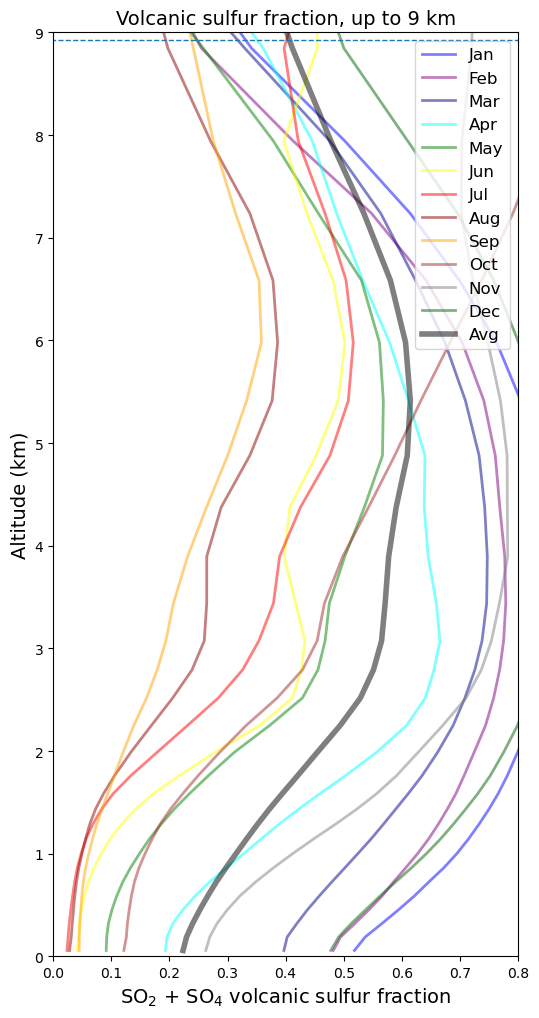

In [45]:
plt.figure(figsize=[6,12])
plt.plot(volc_sulfur_fraction.isel(time=0),altitudes,linewidth=2,color='blue',label='Jan',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=1),altitudes,linewidth=2,color='purple',label='Feb',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=2),altitudes,linewidth=2,color='darkblue',label='Mar',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=3),altitudes,linewidth=2,color='cyan',label='Apr',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=4),altitudes,linewidth=2,color='green',label='May',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=5),altitudes,linewidth=2,color='yellow',label='Jun',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=6),altitudes,linewidth=2,color='red',label='Jul',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=7),altitudes,linewidth=2,color='darkred',label='Aug',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=8),altitudes,linewidth=2,color='orange',label='Sep',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=9),altitudes,linewidth=2,color='brown',label='Oct',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=10),altitudes,linewidth=2,color='gray',label='Nov',alpha=0.5)
plt.plot(volc_sulfur_fraction.isel(time=11),altitudes,linewidth=2,color='darkgreen',label='Dec',alpha=0.5)
plt.plot(np.mean(volc_sulfur_fraction,axis=0),altitudes,linewidth=4,color='k',label='Avg',alpha=0.5)
plt.hlines(y=tropht,xmin=-0.6, xmax=2,linewidth=1,linestyle="--")
# plt.vlines(x=0.34,ymin=0, ymax=75,linewidth=1,linestyle=":")

plt.ylabel('Altitude (km)',fontsize=14)
plt.xlabel('SO$_2$ + SO$_4$ volcanic sulfur fraction',fontsize=14)
plt.title('Volcanic sulfur fraction, up to 9 km',fontsize=14)
# plt.text(x=0, y=7,s="trop. burden mass fraction volcanic S")
plt.xlim([0,0.8])
plt.ylim([0,9])
plt.legend(fontsize=12,loc='upper right')

## Examining Deposition of Sulfur

### Note: Try different masks

Text(-45, 20, '$f_{volc-dep}$ = 22%')

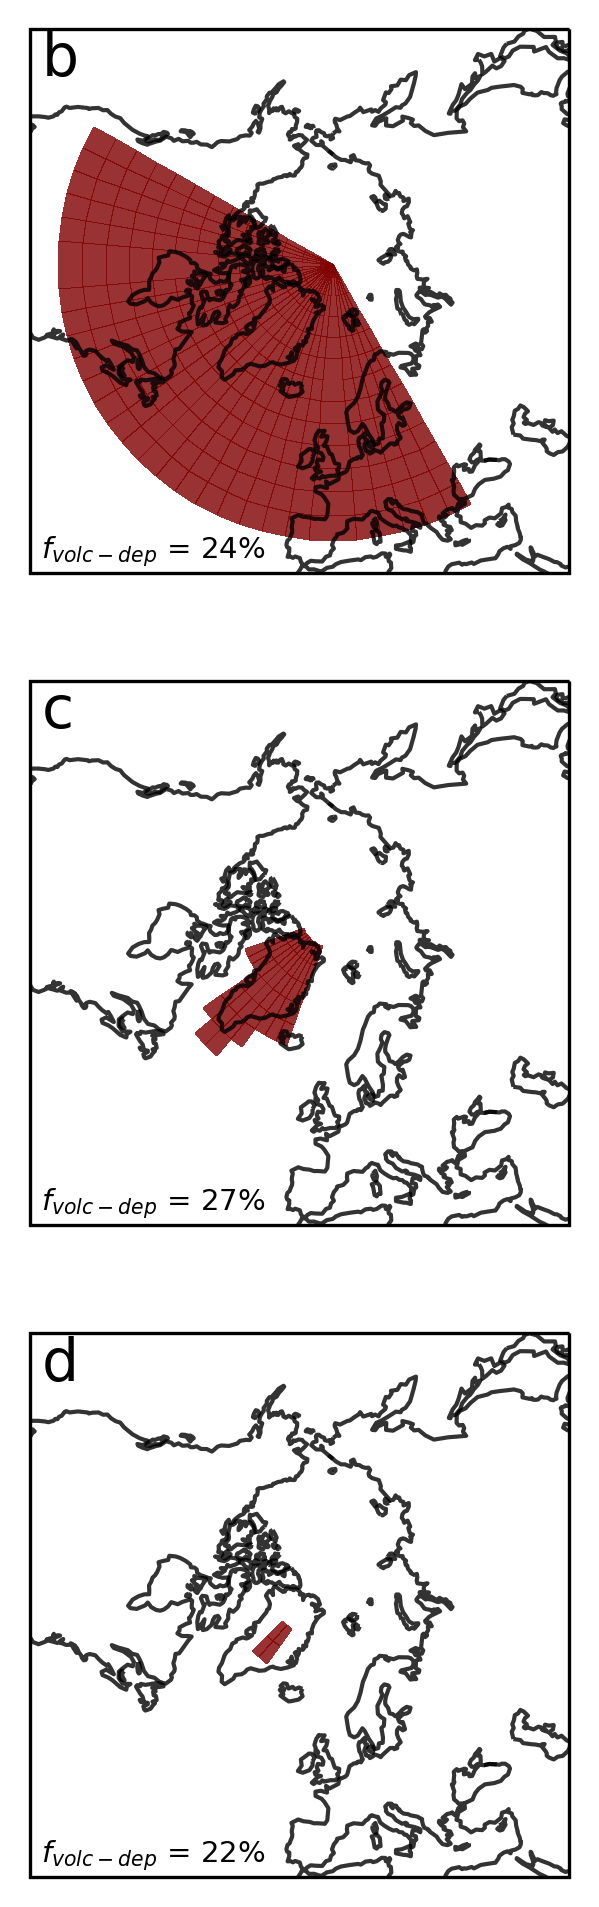

In [46]:
# You can also plot the model output of species concentration in map form!
mask_greenland = np.sum(np.sum(pi_SO4,axis=0),axis=0)*0
mask_greenland[37:44,22:32] = 1
mask_greenland[37:41,21:25] = 0
mask_greenland[37:39,28:32] = 0
mask_greenland[38:39,28:29] = 1
mask_greenland[37:38,25:26] = 0
# mask_greenland = np.sum(volc_SO4,axis=0)*0
# mask_greenland[:,37:43,25:32] = 1

mask_snowflake = np.sum(np.sum(pi_SO4,axis=0),axis=0)*0
mask_snowflake[35:46,18:35] = 1

shuting_mask = np.sum(np.sum(pi_SO4,axis=0),axis=0)*0
shuting_mask[33:46,12:42] = 1

mask_small = np.sum(np.sum(pi_SO4,axis=0),axis=0)*0
mask_small[40:42,27:29] = 1

mask = pi_SpeciesConc['SpeciesConc_SO4']*0 + shuting_mask

fig, ax = plt.subplots(ncols=1,nrows=3,figsize=[10,8],squeeze=True,dpi=300)
ax[0] = plt.subplot(311,projection=ccrs.NorthPolarStereo())
ax[1] = plt.subplot(312,projection=ccrs.NorthPolarStereo())
ax[2] = plt.subplot(313,projection=ccrs.NorthPolarStereo())

a=10
dr_s1,lon = add_cyclic_point(shuting_mask, coord=mask.lon)
dr_s2,lon = add_cyclic_point(mask_greenland, coord=mask.lon)
dr_s3,lon = add_cyclic_point(mask_small, coord=mask.lon)

color_norm = mpl.colors.LogNorm(vmin=0.001,vmax=0.1)
ax[0].pcolormesh(lon,novolc_SpeciesConc.AREA.lat,shuting_mask,cmap='jet',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[1].pcolormesh(lon,novolc_SpeciesConc.AREA.lat,mask_greenland,cmap='jet',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax[2].pcolormesh(lon,novolc_SpeciesConc.AREA.lat,mask_small,cmap='jet',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
# ax.plot(-40, 74, 'ko', markersize=10, transform=ccrs.PlateCarree())
# ax.text(-40, 76, 'Summit', transform=ccrs.PlateCarree(),fontsize = 25,color='k')
ax[0].set_extent([-140, 50, 35, 90], crs=ccrs.PlateCarree())
ax[1].set_extent([-140, 50, 35, 90], crs=ccrs.PlateCarree())
ax[2].set_extent([-140, 50, 35, 90], crs=ccrs.PlateCarree())

ax[0].coastlines(alpha=0.8)
ax[1].coastlines(alpha=0.8)
ax[2].coastlines(alpha=0.8)

j=14
ax[0].text(-123,29,'b',transform=ccrs.PlateCarree(),fontsize=j)
ax[0].text(-45,20,'$f_{volc-dep}$ = 24%',transform=ccrs.PlateCarree(),fontsize=j/2)

ax[1].text(-123,29,'c',transform=ccrs.PlateCarree(),fontsize=j)
ax[1].text(-45,20,'$f_{volc-dep}$ = 27%',transform=ccrs.PlateCarree(),fontsize=j/2)

ax[2].text(-123,29,'d',transform=ccrs.PlateCarree(),fontsize=j)
ax[2].text(-45,20,'$f_{volc-dep}$ = 22%',transform=ccrs.PlateCarree(),fontsize=j/2)



In [47]:
area_cm2 = area*1e4
days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])

# novolc
drydep_SO2_novolc = novolc_DryDep.DryDep_SO2 * area_cm2 * 96 / 6.02e23 / 1e3  #convert to kg!
drydep_SO4_novolc = novolc_DryDep.DryDep_SO4 * area_cm2 * 96 / 6.02e23 / 1e3
SO2_per_month_novolc = drydep_SO2_novolc*0
SO4_per_month_novolc = drydep_SO4_novolc*0
for i in range(0,12,1):
    SO2_per_month_novolc[i,:,:] = drydep_SO2_novolc[i,:,:] * days_in_month[i] * 86400
    SO4_per_month_novolc[i,:,:] = drydep_SO4_novolc[i,:,:] * days_in_month[i] * 86400
drydep_SO2_kg_novolc = np.sum(SO2_per_month_novolc,axis=0)
drydep_SO4_kg_novolc = np.sum(SO4_per_month_novolc,axis=0)


# pi
drydep_SO2_pi = pi_DryDep.DryDep_SO2 * area_cm2 * 96 / 6.02e23 / 1e3
drydep_SO4_pi = pi_DryDep.DryDep_SO4 * area_cm2 * 96 / 6.02e23 / 1e3
SO2_per_month_pi = drydep_SO2_pi*0
SO4_per_month_pi = drydep_SO4_pi*0
for i in range(0,12,1):
    SO2_per_month_pi[i,:,:] = drydep_SO2_pi[i,:,:] * days_in_month[i] * 86400
    SO4_per_month_pi[i,:,:] = drydep_SO4_pi[i,:,:] * days_in_month[i] * 86400 
drydep_SO2_kg_pi = np.sum(SO2_per_month_pi,axis=0)
drydep_SO4_kg_pi = np.sum(SO4_per_month_pi,axis=0)

# WET LOSS LS

SO2_to_SO4 = 96/64
# no volc
wetlossls_SO2_novolc = np.sum(novolc_WetLossLS.WetLossLS_SO2,axis=1) * SO2_to_SO4
wetlossls_SO4_novolc = np.sum(novolc_WetLossLS.WetLossLS_SO4,axis=1)
wetlossls_SO2_monthly_novolc = wetlossls_SO2_novolc*0
wetlossls_SO4_monthly_novolc = wetlossls_SO4_novolc*0
for i in range(0,12,1):
    wetlossls_SO2_monthly_novolc[i,:,:] = wetlossls_SO2_novolc[i,:,:] * days_in_month[i] * 86400
    wetlossls_SO4_monthly_novolc[i,:,:] = wetlossls_SO4_novolc[i,:,:] * days_in_month[i] * 86400
SO2_wetlossls_kg_novolc = np.sum(wetlossls_SO2_monthly_novolc,axis=0)
SO4_wetlossls_kg_novolc = np.sum(wetlossls_SO4_monthly_novolc,axis=0)

# pi
wetlossls_SO2_pi = np.sum(pi_WetLossLS.WetLossLS_SO2,axis=1) * SO2_to_SO4
wetlossls_SO4_pi = np.sum(pi_WetLossLS.WetLossLS_SO4,axis=1)
wetlossls_SO2_monthly_pi = wetlossls_SO2_pi*0
wetlossls_SO4_monthly_pi = wetlossls_SO4_pi*0
for i in range(0,12,1):
    wetlossls_SO2_monthly_pi[i,:,:] = wetlossls_SO2_pi[i,:,:] * days_in_month[i] * 86400
    wetlossls_SO4_monthly_pi[i,:,:] = wetlossls_SO4_pi[i,:,:] * days_in_month[i] * 86400
SO2_wetlossls_kg_pi = np.sum(wetlossls_SO2_monthly_pi,axis=0)
SO4_wetlossls_kg_pi = np.sum(wetlossls_SO4_monthly_pi,axis=0)

#WET LOSS CONV

# no volc
wetlossconv_SO2_novolc = np.sum(novolc_WetLossConv.WetLossConv_SO2,axis=1) * SO2_to_SO4
wetlossconv_SO4_novolc = np.sum(novolc_WetLossConv.WetLossConv_SO4,axis=1)
wetlossconv_SO2_monthly_novolc = wetlossconv_SO2_novolc*0
wetlossconv_SO4_monthly_novolc = wetlossconv_SO4_novolc*0
for i in range(0,12,1):
    wetlossconv_SO2_monthly_novolc[i,:,:] = wetlossconv_SO2_novolc[i,:,:] * days_in_month[i] * 86400
    wetlossconv_SO4_monthly_novolc[i,:,:] = wetlossconv_SO4_novolc[i,:,:] * days_in_month[i] * 86400  
SO2_wetlossconv_kg_novolc = np.sum(wetlossconv_SO2_monthly_novolc,axis=0)
SO4_wetlossconv_kg_novolc = np.sum(wetlossconv_SO4_monthly_novolc,axis=0)

# pi
wetlossconv_SO2_pi = np.sum(pi_WetLossConv.WetLossConv_SO2,axis=1) * SO2_to_SO4
wetlossconv_SO4_pi = np.sum(pi_WetLossConv.WetLossConv_SO4,axis=1)
wetlossconv_SO2_monthly_pi = wetlossconv_SO2_pi*0
wetlossconv_SO4_monthly_pi = wetlossconv_SO4_pi*0
for i in range(0,12,1):
    wetlossconv_SO2_monthly_pi[i,:,:] = wetlossconv_SO2_pi[i,:,:] * days_in_month[i] * 86400
    wetlossconv_SO4_monthly_pi[i,:,:] = wetlossconv_SO4_pi[i,:,:] * days_in_month[i] * 86400  
SO2_wetlossconv_kg_pi = np.sum(wetlossconv_SO2_monthly_pi,axis=0)
SO4_wetlossconv_kg_pi = np.sum(wetlossconv_SO4_monthly_pi,axis=0)


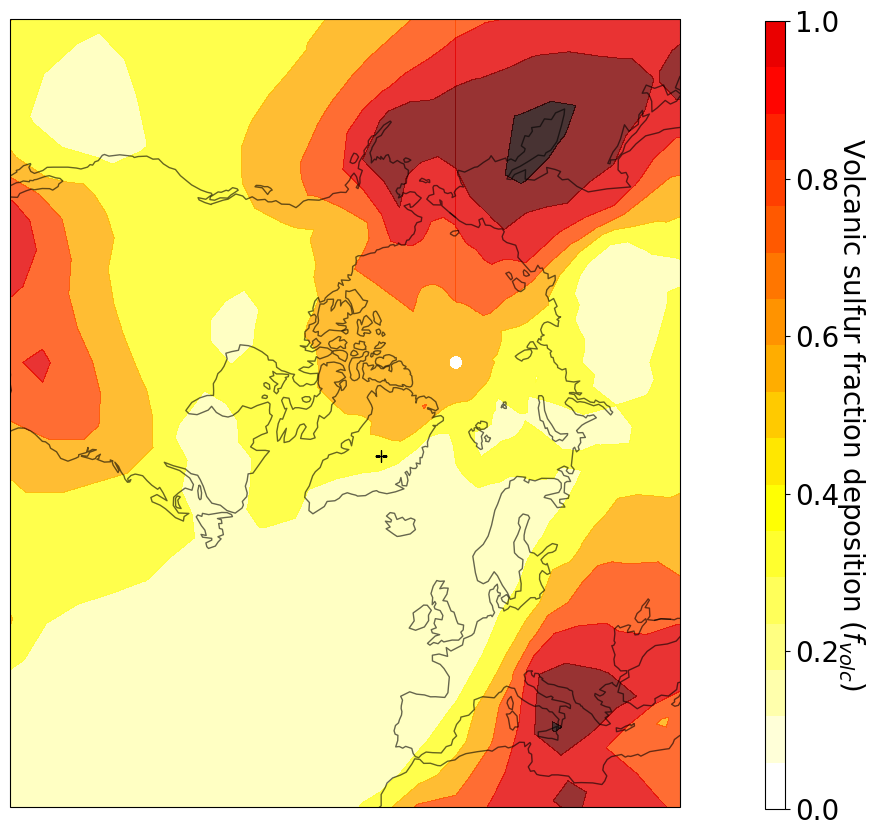

In [48]:
dep_pi_map = drydep_SO2_kg_pi+drydep_SO4_kg_pi+SO2_wetlossls_kg_pi+SO4_wetlossls_kg_pi+SO2_wetlossconv_kg_pi+SO4_wetlossconv_kg_pi
dep_novolc_map = drydep_SO2_kg_novolc+drydep_SO4_kg_novolc+SO2_wetlossls_kg_novolc+SO4_wetlossls_kg_novolc+SO2_wetlossconv_kg_novolc+SO4_wetlossconv_kg_novolc

fracmap = 1-(dep_novolc_map/dep_pi_map)
drs=fracmap

fig = plt.figure(figsize=[10,8])
ax = plt.subplot(projection=ccrs.NorthPolarStereo(),position=[0,0,0.04,0.8])
a=10
dr_s,lon = add_cyclic_point(drs, coord=drs.lon)

cmap = mpl.cm.hot_r(np.linspace(0,1,25))
cmap = mpl.colors.ListedColormap(cmap[0:17])
color_norm = mpl.colors.Normalize(vmin=0,vmax=1.0)
llon, llat = np.meshgrid(lon[12:42],novolc_SpeciesConc.AREA.lat[33:46])

j=20
z=5
m=10
l=2

ax.contourf(lon,pi_h2s_17_frac_volc_SO2SO4.lat,dr_s,cmap='hot_r',norm=color_norm,transform=ccrs.PlateCarree(),alpha=0.8)
ax.plot(-38.62, 72.58, '+', color='k',markersize=8, transform=ccrs.PlateCarree())
ax.set_extent([-140, 30, 30, 90], crs=ccrs.PlateCarree())

ax.coastlines(alpha=0.6)
dm_nit = plt.cm.ScalarMappable(cmap=cmap,norm=color_norm)
dm_nit.set_array([])
cax = plt.axes([0.92, 0.005, 0.02, 0.985])
cbar = plt.colorbar(dm_nit, orientation = 'vertical', cax=cax)
cbar.set_label('Volcanic sulfur fraction deposition ($f_{volc}$)', rotation=270,labelpad=20,fontsize=j)

plt.subplots_adjust(bottom=0, right=1, left=0.1, top=1)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.tick_params(labelsize=j)



In [49]:
total_volc_S = drydep_SO2_kg_pi + drydep_SO4_kg_pi + SO2_wetlossls_kg_pi + SO4_wetlossls_kg_pi + SO2_wetlossconv_kg_pi + SO4_wetlossconv_kg_pi

total_novolc_S = drydep_SO2_kg_novolc + drydep_SO4_kg_novolc + SO2_wetlossls_kg_novolc + SO4_wetlossls_kg_novolc + SO2_wetlossconv_kg_novolc + SO4_wetlossconv_kg_novolc

total_S_volcfrac_shuting = np.round(np.mean((1 - (total_novolc_S*shuting_mask*area) / (total_volc_S*shuting_mask*area))),2).values
total_S_volcfrac_greenland = np.round(np.mean((1 - (total_novolc_S*mask_greenland*area) / (total_volc_S*mask_greenland*area))),2).values
total_S_volcfrac_small = np.round(np.mean((1 - (total_novolc_S*mask_small*area) / (total_volc_S*mask_small*area))),2).values

print('AREA WEIGHTED CALCULATION')
print('Volcanic sulfur fraction of deposition in back trajectory region:',total_S_volcfrac_shuting)
print('Volcanic sulfur fraction of deposition in Greenland:',total_S_volcfrac_greenland)
print('Volcanic sulfur fraction of deposition near Summit:',total_S_volcfrac_small)


AREA WEIGHTED CALCULATION
Volcanic sulfur fraction of deposition in back trajectory region: 0.24
Volcanic sulfur fraction of deposition in Greenland: 0.27
Volcanic sulfur fraction of deposition near Summit: 0.22


## Comparison to Breider et al. (2013)

Plot concentrations over each season from Barrow (71, -156), Alert (82, -162), Zeppelin (78,11), and Trapper Creek (62, -150)

In [50]:
def breider_compare(lat1,lon1,SO4,met):
    latslice = slice(lat1-4,lat1+4)
    lonslice = slice(lon1-4,lon1+5)
    levslice = slice(0,1)
    
    SpeciesConc_SO4 = SO4.SpeciesConc_SO4
    SpeciesConc_SO4['lev'] = np.arange(72)
    airden = met.Met_AIRDEN
    airden['lev'] = np.arange(72)
    
    levs = SpeciesConc_SO4.sel(lev=levslice).lev
    lats = SpeciesConc_SO4.sel(lat=latslice).lat
    lons = SpeciesConc_SO4.sel(lon=lonslice).lon
    
    tempSO4 =  SpeciesConc_SO4.sel(lat=latslice,lon=lonslice,lev=levslice)
    tempairden = airden.sel(lat=latslice,lon=lonslice,lev=levslice)
    tempSO4conc = tempSO4 * 0
    
    for i in range(0,len(tempSO4.time),1):
        for j in range(levs[0].values,levs[len(levs)-1].values,1):
            for k in range(0,len(lats),1):
                for l in range(0,len(lons),1):
                    tempSO4conc[i,j,k,l] = tempSO4[i,j,k,l] * tempairden[i,j,k,l] * 1e9 * 96/28
                    
    return tempSO4conc

In [51]:
barrow_anthdef_SO4_meanconc = breider_compare(71,-156,pd_def_SpeciesConc,pd_def_StateMet).mean(dim=('lev','lat','lon'))
barrow_natdef_SO4_meanconc = breider_compare(71,-156,pi_SpeciesConc,pi_StateMet).mean(dim=('lev','lat','lon'))
barrow_anth17_SO4_meanconc = breider_compare(71,-156,pd_h2s_17_SpeciesConc,pd_h2s_17_StateMet).mean(dim=('lev','lat','lon'))
barrow_nat17_SO4_meanconc = breider_compare(71,-156,pd_h2s_17_SpeciesConc,pd_h2s_17_StateMet).mean(dim=('lev','lat','lon'))
barrow_novolc_SO4_meanconc = breider_compare(71,-156,novolc_SpeciesConc,novolc_StateMet).mean(dim=('lev','lat','lon'))

zeppelin_anthdef_SO4_meanconc = (breider_compare(78,11,pd_def_SpeciesConc,pd_def_StateMet)).mean(dim=('lev','lat','lon'))
zeppelin_natdef_SO4_meanconc = (breider_compare(78,11,pi_SpeciesConc,pi_StateMet)).mean(dim=('lev','lat','lon'))
zeppelin_anth17_SO4_meanconc = (breider_compare(78,11,pd_h2s_17_SpeciesConc,pd_h2s_17_StateMet)).mean(dim=('lev','lat','lon'))
zeppelin_nat17_SO4_meanconc = (breider_compare(78,11,pd_h2s_17_SpeciesConc,pd_h2s_17_StateMet)).mean(dim=('lev','lat','lon'))
zeppelin_novolc_SO4_meanconc = (breider_compare(78,11,novolc_SpeciesConc,novolc_StateMet)).mean(dim=('lev','lat','lon'))

alert_anthdef_SO4_meanconc = (breider_compare(82,-62,pd_def_SpeciesConc,pd_def_StateMet)).mean(dim=('lev','lat','lon'))
alert_natdef_SO4_meanconc = (breider_compare(82,-62,pi_SpeciesConc,pi_StateMet)).mean(dim=('lev','lat','lon'))
alert_anth17_SO4_meanconc = (breider_compare(82,-62,pd_h2s_17_SpeciesConc,pd_h2s_17_StateMet)).mean(dim=('lev','lat','lon'))
alert_nat17_SO4_meanconc = (breider_compare(82,-62,pd_h2s_17_SpeciesConc,pd_h2s_17_StateMet)).mean(dim=('lev','lat','lon'))
alert_novolc_SO4_meanconc = (breider_compare(82,-62,novolc_SpeciesConc,novolc_StateMet)).mean(dim=('lev','lat','lon'))

trapper_anthdef_SO4_meanconc = (breider_compare(62,-150,pd_def_SpeciesConc,pd_def_StateMet)).mean(dim=('lev','lat','lon'))
trapper_natdef_SO4_meanconc = (breider_compare(62,-150,pi_SpeciesConc,pi_StateMet)).mean(dim=('lev','lat','lon'))
trapper_anth17_SO4_meanconc = (breider_compare(62,-150,pd_h2s_17_SpeciesConc,pd_h2s_17_StateMet)).mean(dim=('lev','lat','lon'))
trapper_nat17_SO4_meanconc = (breider_compare(62,-150,pd_h2s_17_SpeciesConc,pd_h2s_17_StateMet)).mean(dim=('lev','lat','lon'))
trapper_novolc_SO4_meanconc = (breider_compare(62,-150,novolc_SpeciesConc,novolc_StateMet)).mean(dim=('lev','lat','lon'))


Text(0.5, 1.0, 'Trapper Creek, Alaska (62, -150): H2S 1.7 scenario')

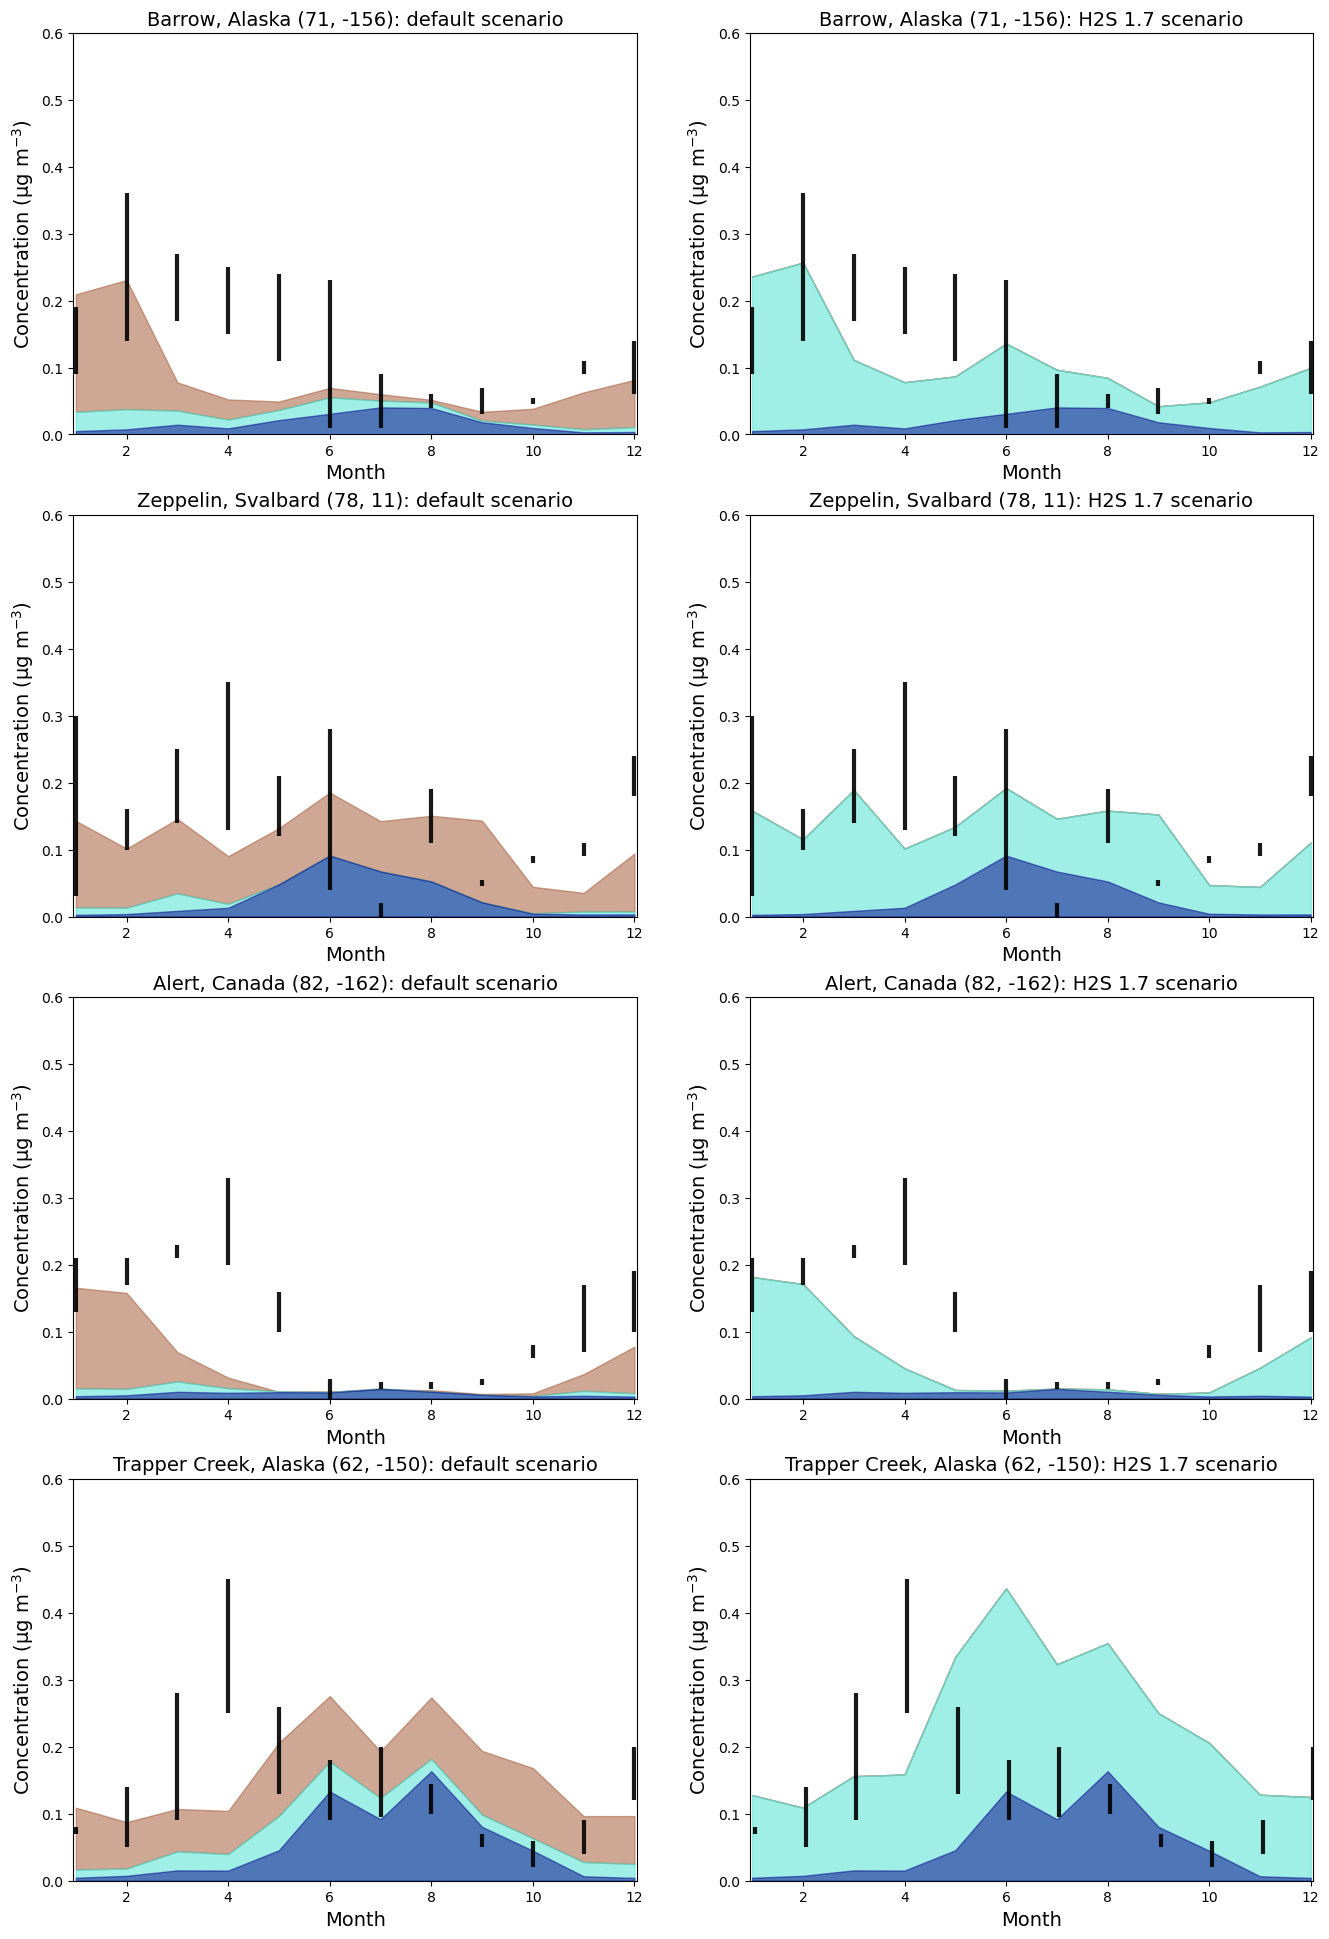

In [52]:
lw=3
mos = np.arange(1,13,1)
fig,ax = plt.subplots(ncols=2,nrows=4,figsize=[16,24],squeeze=True)
ax[0,0].fill_between(mos,barrow_natdef_SO4_meanconc,barrow_anthdef_SO4_meanconc,color='sienna',alpha=0.5,label='default anthro SO4')
ax[0,0].fill_between(mos,barrow_natdef_SO4_meanconc,color='turquoise',alpha=0.5,label='default volc SO4')
ax[0,0].fill_between(mos,barrow_novolc_SO4_meanconc,color='darkblue',alpha=0.5,label='bio SO4')
up   = np.array([0.10,0.07,0.05,0.10,0.09,0.13,0.04,0.01,0.02,0.005,0.01,0.04])
down = np.array([0.0 ,0.15,0.05,0.0 ,0.04,0.09,0.04,0.01,0.02,0.005,0.01,0.04])
yerr = np.vstack([down,up])
obs = np.array([0.09,0.29,0.22,0.15,0.15,0.10,0.05,0.05,0.05,0.05,0.10,0.10])
ax[0,0].errorbar(mos,obs,yerr,color='k',fmt='o',markersize=0,alpha=0.9,ecolor='k',linewidth=lw,label='observations')

ax[0,1].fill_between(mos,barrow_nat17_SO4_meanconc,barrow_anth17_SO4_meanconc,color='sienna',alpha=0.5,label='default anthro SO4')
ax[0,1].fill_between(mos,barrow_nat17_SO4_meanconc,color='turquoise',alpha=0.5,label='default volc SO4')
ax[0,1].fill_between(mos,barrow_novolc_SO4_meanconc,color='darkblue',alpha=0.5,label='bio SO4')
up   = np.array([0.10,0.07,0.05,0.10,0.09,0.13,0.04,0.01,0.02,0.005,0.01,0.04])
down = np.array([0.0 ,0.15,0.05,0.0 ,0.04,0.09,0.04,0.01,0.02,0.005,0.01,0.04])
yerr = np.vstack([down,up])
obs = np.array([0.09,0.29,0.22,0.15,0.15,0.10,0.05,0.05,0.05,0.05,0.10,0.10])
ax[0,1].errorbar(mos,obs,yerr,color='k',fmt='o',markersize=0,alpha=0.9,ecolor='k',linewidth=lw,label='observations')

ax[1,0].fill_between(mos,zeppelin_natdef_SO4_meanconc,zeppelin_anthdef_SO4_meanconc,color='sienna',alpha=0.5,label='default anthro SO4')
ax[1,0].fill_between(mos,zeppelin_natdef_SO4_meanconc,color='turquoise',alpha=0.5,label='default volc SO4')
ax[1,0].fill_between(mos,zeppelin_novolc_SO4_meanconc,color='darkblue',alpha=0.5,label='bio SO4')
up   = np.array([0.25,0.05,0.01,0.06,0.01,0.18,0.01,0.04,0.005 ,0.0 ,0.01,0.06])
down = np.array([0.02,0.01,0.10,0.16,0.08,0.06,0.05,0.04,0.005 ,0.01,0.01,0.0 ])
yerr = np.vstack([down,up])
obs = np.array([0.05,0.11,0.24,0.29,0.20,0.10,0.01,0.15,0.05,0.09,0.10,0.18])
ax[1,0].errorbar(mos,obs,yerr,color='k',fmt='o',markersize=0,alpha=0.9,ecolor='k',linewidth=lw,label='observations')

ax[1,1].fill_between(mos,zeppelin_nat17_SO4_meanconc,zeppelin_anth17_SO4_meanconc,color='sienna',alpha=0.5,label='default anthro SO4')
ax[1,1].fill_between(mos,zeppelin_nat17_SO4_meanconc,color='turquoise',alpha=0.5,label='default volc SO4')
ax[1,1].fill_between(mos,zeppelin_novolc_SO4_meanconc,color='darkblue',alpha=0.5,label='bio SO4')
up   = np.array([0.25,0.05,0.01,0.06,0.01,0.18,0.01,0.04,0.005 ,0.0 ,0.01,0.06])
down = np.array([0.02,0.01,0.10,0.16,0.08,0.06,0.05,0.04,0.005 ,0.01,0.01,0.0 ])
yerr = np.vstack([down,up])
obs = np.array([0.05,0.11,0.24,0.29,0.20,0.10,0.01,0.15,0.05,0.09,0.10,0.18])
ax[1,1].errorbar(mos,obs,yerr,color='k',fmt='o',markersize=0,alpha=0.9,ecolor='k',linewidth=lw,label='observations')

ax[2,0].fill_between(mos,alert_natdef_SO4_meanconc,alert_anthdef_SO4_meanconc,color='sienna',alpha=0.5,label='default anthro SO4')
ax[2,0].fill_between(mos,alert_natdef_SO4_meanconc,color='turquoise',alpha=0.5,label='default volc SO4')
ax[2,0].fill_between(mos,alert_novolc_SO4_meanconc,color='darkblue',alpha=0.5,label='bio SO4')
up   = np.array([0.05,0.02,0.0 ,0.03,0.03,0.0 ,0.005 ,0.005 ,0.01,0.0 ,0.05,0.09])
down = np.array([0.03,0.02,0.02,0.10,0.03,0.08,0.005 ,0.005 ,0.0 ,0.02,0.05,0.0 ])
yerr = np.vstack([down,up])
errobs = np.array([0.16,0.19,0.23,0.30,0.13,0.03,0.02,0.02,0.02,0.08,0.12,0.10])
obs = np.array([0.16,0.19,0.23,0.30,0.20,0.03,0.02,0.02,0.02,0.08,0.20,0.10])
ax[2,0].errorbar(mos,errobs,yerr,color='k',fmt='o',markersize=0,alpha=0.9,ecolor='k',linewidth=lw,label='observations')

ax[2,1].fill_between(mos,alert_nat17_SO4_meanconc,alert_anth17_SO4_meanconc,color='sienna',alpha=0.5,label='default anthro SO4')
ax[2,1].fill_between(mos,alert_nat17_SO4_meanconc,color='turquoise',alpha=0.5,label='default volc SO4')
ax[2,1].fill_between(mos,alert_novolc_SO4_meanconc,color='darkblue',alpha=0.5,label='bio SO4')
up   = np.array([0.05,0.02,0.0 ,0.03,0.03,0.0 ,0.005 ,0.005 ,0.01,0.0 ,0.05,0.09])
down = np.array([0.03,0.02,0.02,0.10,0.03,0.08,0.005 ,0.005 ,0.0 ,0.02,0.05,0.0 ])
yerr = np.vstack([down,up])
errobs = np.array([0.16,0.19,0.23,0.30,0.13,0.03,0.02,0.02,0.02,0.08,0.12,0.10])
obs = np.array([0.16,0.19,0.23,0.30,0.20,0.03,0.02,0.02,0.02,0.08,0.20,0.10])
ax[2,1].errorbar(mos,errobs,yerr,color='k',fmt='o',markersize=0,alpha=0.9,ecolor='k',linewidth=lw,label='observations')

ax[3,0].fill_between(mos,trapper_natdef_SO4_meanconc,trapper_anthdef_SO4_meanconc,color='sienna',alpha=0.5,label='default anthro SO4')
ax[3,0].fill_between(mos,trapper_natdef_SO4_meanconc,color='turquoise',alpha=0.5,label='default volc SO4')
ax[3,0].fill_between(mos,trapper_novolc_SO4_meanconc,color='darkblue',alpha=0.5,label='bio SO4')
up   = np.array([0.0 ,0.06,0.19,0.10,0.13,0.05,0.10, 0.005,0.02,0.0 ,0.0 ,0.04])
down = np.array([0.01,0.03,0.0 ,0.10,0.0 ,0.04,0.005,0.04, 0.0 ,0.04,0.05,0.04])
yerr = np.vstack([down,up])
errobs = np.array([0.08,0.08,0.09,0.20,0.13,0.13,0.10,0.14,0.05,0.06,0.09,0.06])
obs = np.array([0.08,0.08,0.09,0.35,0.13,0.13,0.10,0.14,0.05,0.06,0.09,0.16])
ax[3,0].errorbar(mos,obs,yerr,color='k',fmt='o',markersize=0,alpha=0.9,ecolor='k',linewidth=lw,label='observations')

ax[3,1].fill_between(mos,trapper_nat17_SO4_meanconc,trapper_anth17_SO4_meanconc,color='sienna',alpha=0.5,label='default anthro SO4')
ax[3,1].fill_between(mos,trapper_nat17_SO4_meanconc,color='turquoise',alpha=0.5,label='default volc SO4')
ax[3,1].fill_between(mos,trapper_novolc_SO4_meanconc,color='darkblue',alpha=0.5,label='bio SO4')
up   = np.array([0.0 ,0.06,0.19,0.10,0.13,0.05,0.10, 0.005,0.02,0.0 ,0.0 ,0.04])
down = np.array([0.01,0.03,0.0 ,0.10,0.0 ,0.04,0.005,0.04, 0.0 ,0.04,0.05,0.04])
yerr = np.vstack([down,up])
errobs = np.array([0.08,0.08,0.09,0.20,0.13,0.13,0.10,0.14,0.05,0.06,0.09,0.06])
obs = np.array([0.08,0.08,0.09,0.35,0.13,0.13,0.10,0.14,0.05,0.06,0.09,0.16])
ax[3,1].errorbar(mos+0.05,obs,yerr,color='k',fmt='o',markersize=0,alpha=0.9,ecolor='k',linewidth=lw,label='observations')

ax[0,0].set_xlim([1-0.05,12+0.05])
ax[0,1].set_xlim([1-0.05,12+0.05])
ax[1,0].set_xlim([1-0.05,12+0.05])
ax[1,1].set_xlim([1-0.05,12+0.05])
ax[2,0].set_xlim([1-0.05,12+0.05])
ax[2,1].set_xlim([1-0.05,12+0.05])
ax[3,0].set_xlim([1-0.05,12+0.05])
ax[3,1].set_xlim([1-0.05,12+0.05])

ax[0,0].set_ylim([0,0.60])
ax[0,1].set_ylim([0,0.60])
ax[1,0].set_ylim([0,0.60])
ax[1,1].set_ylim([0,0.60])
ax[2,0].set_ylim([0,0.60])
ax[2,1].set_ylim([0,0.60])
ax[3,0].set_ylim([0,0.60])
ax[3,1].set_ylim([0,0.60])

ax[0,0].set_ylabel('Concentration (µg m$^{-3}$)',fontsize=14)
ax[0,1].set_ylabel('Concentration (µg m$^{-3}$)',fontsize=14)
ax[1,0].set_ylabel('Concentration (µg m$^{-3}$)',fontsize=14)
ax[1,1].set_ylabel('Concentration (µg m$^{-3}$)',fontsize=14)
ax[2,0].set_ylabel('Concentration (µg m$^{-3}$)',fontsize=14)
ax[2,1].set_ylabel('Concentration (µg m$^{-3}$)',fontsize=14)
ax[3,0].set_ylabel('Concentration (µg m$^{-3}$)',fontsize=14)
ax[3,1].set_ylabel('Concentration (µg m$^{-3}$)',fontsize=14)

ax[0,0].set_xlabel('Month',fontsize=14)
ax[0,1].set_xlabel('Month',fontsize=14)
ax[1,0].set_xlabel('Month',fontsize=14)
ax[1,1].set_xlabel('Month',fontsize=14)
ax[2,0].set_xlabel('Month',fontsize=14)
ax[2,1].set_xlabel('Month',fontsize=14)
ax[3,0].set_xlabel('Month',fontsize=14)
ax[3,1].set_xlabel('Month',fontsize=14)

ax[0,0].set_title('Barrow, Alaska (71, -156): default scenario',fontsize=14)
ax[0,1].set_title('Barrow, Alaska (71, -156): H2S 1.7 scenario',fontsize=14)
ax[1,0].set_title('Zeppelin, Svalbard (78, 11): default scenario',fontsize=14)
ax[1,1].set_title('Zeppelin, Svalbard (78, 11): H2S 1.7 scenario',fontsize=14)
ax[2,0].set_title('Alert, Canada (82, -162): default scenario',fontsize=14)
ax[2,1].set_title('Alert, Canada (82, -162): H2S 1.7 scenario',fontsize=14)
ax[3,0].set_title('Trapper Creek, Alaska (62, -150): default scenario',fontsize=14)
ax[3,1].set_title('Trapper Creek, Alaska (62, -150): H2S 1.7 scenario',fontsize=14)